In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_year1= pd.read_excel('1__year.xlsx')

In [ ]:
df_year1

Attr1    Attr2    Attr3    Attr4     Attr5     Attr6     Attr7  \
0     0.200550  0.37951  0.39641  2.04720   32.3510  0.388250  0.249760   
1     0.209120  0.49988  0.47225  1.94470   14.7860  0.000000  0.258340   
2     0.248660  0.69592  0.26713  1.55480   -1.1523  0.000000  0.309060   
3     0.081483  0.30734  0.45879  2.49280   51.9520  0.149880  0.092704   
4     0.187320  0.61323  0.22960  1.40630   -7.3128  0.187320  0.187320   
...        ...      ...      ...      ...       ...       ...       ...   
7022  0.018371  0.47410 -0.13619  0.60839  -18.4490  0.018371  0.018371   
7023 -0.013359  0.58354 -0.02265  0.92896  -42.2320 -0.013359 -0.015036   
7024  0.006338  0.50276  0.43923  1.87360    9.7417  0.006338  0.012022   
7025 -0.041643  0.84810 -0.12852  0.57485 -121.9200  0.000000 -0.036795   
7026  0.014946  0.94648  0.03211  1.03630  -20.5810  0.000000  0.015260   

         Attr8    Attr9    Attr10  ...    Attr56    Attr57   Attr58    Attr59  \
0     1.330500  1.13890  0.504940  ...  0.121960  0.397180  0.87804  0.001924   
1     0.996010  1.69960  0.497880  ...  0.121300  0.420020  0.85300  0.000000   
2     0.436950  1.30900  0.304080  ...  0.241140  0.817740  0.76599  0.694840   
3     1.866100  1.05710  0.573530  ...  0.054015  0.142070  0.94598  0.000000   
4     0.630700  1.15590  0.386770  ...  0.134850  0.484310  0.86515  0.124440   
...        ...      ...       ...  ...       ...       ...      ...       ...   
7022  0.972030  1.01210  0.460840  ...  0.011909  0.039866  0.98809  0.274140   
7023  0.562890  0.98904  0.328470  ... -0.011082 -0.040671  1.01110  0.805920   
7024  0.983560  1.00830  0.494490  ...  0.008258  0.012817  0.99174  0.000000   
7025  0.179010  0.42138  0.151820  ... -0.232720 -0.274290  0.98788  3.593100   
7026  0.056357  2.96940  0.053341  ...  0.015705  0.280210  0.97443  1.179200   

       Attr60   Attr61   Attr62   Attr63    Attr64  class  
0      8.4160   5.1372   82.658   4.4158   7.42770   b'0'  
1      4.1486   3.2732  107.350   3.4000  60.98700   b'0'  
2      4.9909   3.9510  134.270   2.7185   5.20780   b'0'  
3      4.5746   3.6147   86.435   4.2228   5.54970   b'0'  
4      6.3985   4.3158  127.210   2.8692   7.89800   b'0'  
...       ...      ...      ...      ...       ...    ...  
7022  73.5050  79.2370   31.268  11.6730   5.14890   b'1'  
7023  10.5990   7.1740   94.092   3.8792   1.75720   b'1'  
7024  10.4700   6.0759   51.019   7.1542  62.00100   b'1'  
7025  39.7030   3.1420  261.850   1.3939   0.51005   b'1'  
7026  15.0360   4.1741  108.640   3.3599  35.11800   b'1'  

[7027 rows x 65 columns]

In [ ]:
# Converted all features to numeric (invalid strings become NaN)
# Excluded the target column from this step
feature_cols = df_year1.columns[:-1]  # assuming last column is 'class'
df_year1[feature_cols] = df_year1[feature_cols].apply(pd.to_numeric, errors='coerce')

#  Clean the target column: converted from bytes (e.g., b'0') to integer
df_year1['class'] = df_year1['class'].astype(str).str.extract(r'(\d)').astype(int)

In [ ]:
# Separated features and target
X = df_year1.iloc[:, :-1]  # first 64 columns (financial features)
y = df_year1.iloc[:, -1]   # last column ('class')

In [ ]:
missing = df_year1.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Columns with missing values:\n")
print(missing)

Columns with missing values:

Attr37    2740
Attr21    1622
Attr27     311
Attr60     135
Attr45     134
Attr24     124
Attr41      84
Attr11      39
Attr32      38
Attr54      34
Attr64      34
Attr28      34
Attr53      34
Attr46      31
Attr12      30
Attr63      30
Attr4       30
Attr33      30
Attr40      30
Attr47      29
Attr52      29
Attr26      25
Attr16      25
Attr50      25
Attr34      25
Attr8       25
Attr17      25
Attr61      22
Attr5        8
Attr3        3
Attr1        3
Attr7        3
Attr14       3
Attr38       3
Attr36       3
Attr10       3
Attr18       3
Attr2        3
Attr6        3
Attr25       3
Attr22       3
Attr51       3
Attr48       3
Attr35       3
Attr29       3
Attr15       2
Attr9        1
Attr59       1
Attr57       1
dtype: int64


In [ ]:
from sklearn.impute import KNNImputer


In [ ]:
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

In [ ]:
X_imputed = pd.DataFrame(X_imputed, columns=X.columns)

In [ ]:
missing = X_imputed .isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)

print("Columns with missing values:\n")
print(missing)

Columns with missing values:

Series([], dtype: int64)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
!pip install shap

In [ ]:
!pip install imbalanced-learn

In [ ]:
!pip install deap optuna

In [ ]:
!pip install optuna imbalanced-learn xgboost pyswarms

In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE, BorderlineSMOTE, SVMSMOTE, ADASYN
from imblearn.combine import SMOTEENN, SMOTETomek
import shap


In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [ ]:
import random

In [ ]:
import pyswarms as ps

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.calibration import CalibratedClassifierCV
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, stratify=y, test_size=0.2, random_state=42)

# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_lr = []
cm_lr=[]
roc_lr = {}
shap_values_lr = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        pipeline = Pipeline([
               ('scaler', StandardScaler()),
               ('resampler', sampler),
               ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

        pipeline.fit(X_train, y_train)

        # Predict with optimal threshold
        y_prob = pipeline.predict_proba(X_test)[:, 1]  # Probabilities of class 1 (bankrupt)


        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        optimal_threshold = thresholds[np.argmax(f1_scores)]
        y_pred = (y_prob >= optimal_threshold).astype(int)


        # Evaluate

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_lr.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_lr.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_lr[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_lr = pd.DataFrame(results_lr)

# Round for readability
results_df_lr = results_df_lr.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_lr)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.8741     0.1227                0.3704       0.8942   
1  BorderlineSMOTE    0.9303     0.1562                0.1852       0.9601   
2           ADASYN    0.8656     0.1229                0.4074       0.8839   
3         SVMSMOTE    0.7824     0.0987                0.5741       0.7907   
4         SMOTEENN    0.8805     0.1299                0.3704       0.9009   
5       SMOTETomek    0.8741     0.1227                0.3704       0.8942   

   F1 Score  ROC AUC  
0    0.1843   0.7064  
1    0.1695   0.7251  
2    0.1888   0.6998  
3    0.1685   0.7227  
4    0.1923   0.7194  
5    0.1843   0.7069

SMOTE


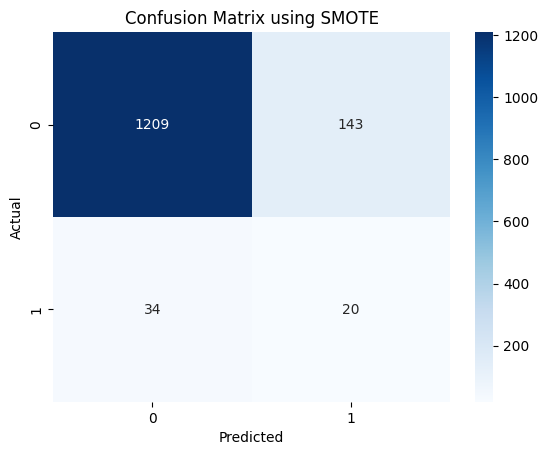

BorderlineSMOTE


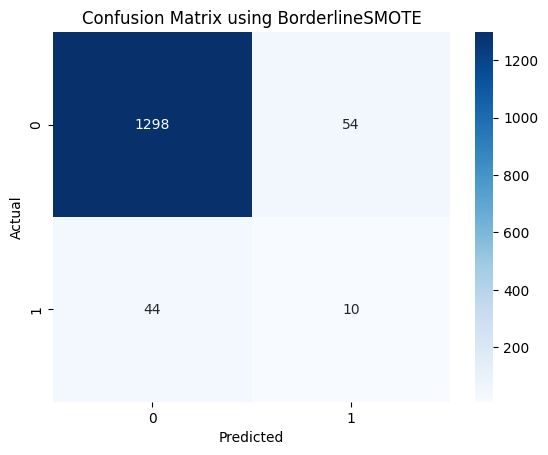

ADASYN


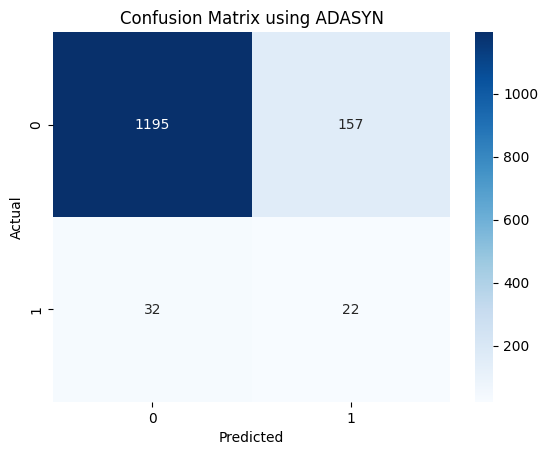

SVMSMOTE


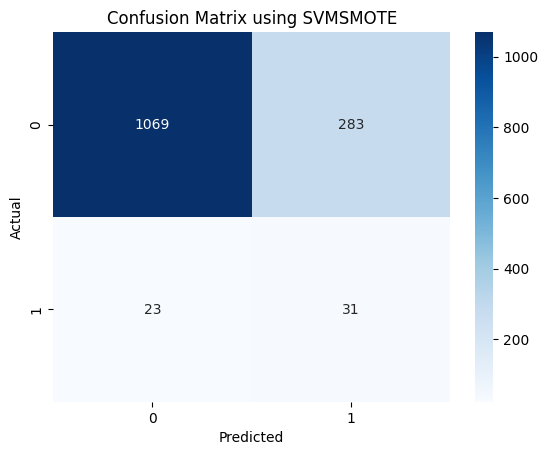

SMOTEENN


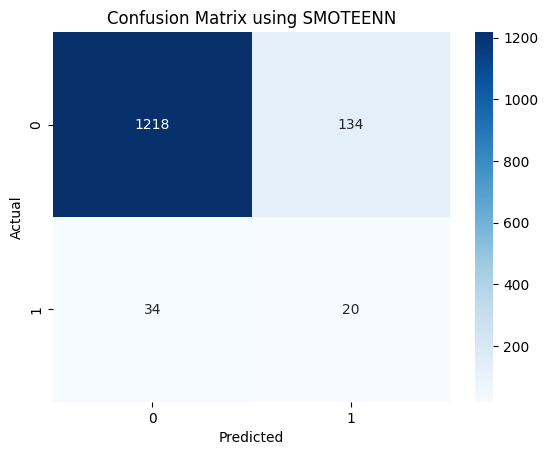

SMOTETomek


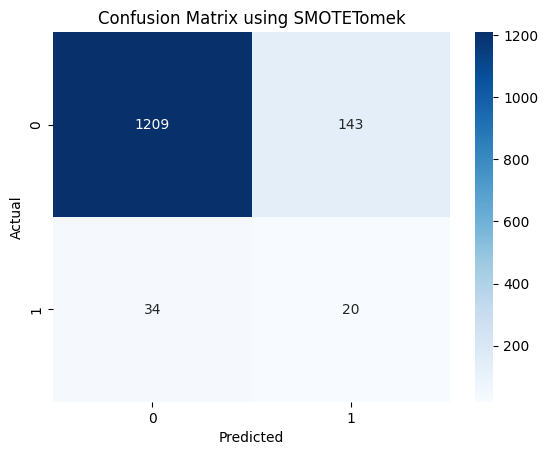

In [ ]:
#confusion matrix plot
for x in cm_lr:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

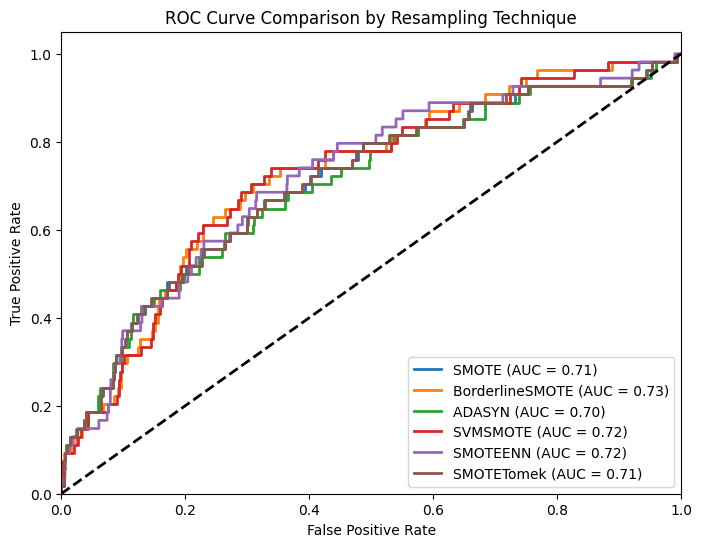

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_lr.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**Logistic Regression with GA**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression


# Define resampling techniques
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

# Store results and CM
results_lr_ga = []
cm_lr_ga=[]

# Loop over each resampling method
for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)


        # Genetic Algorithm for Hyperparameter Optimization

        from deap import base, creator, tools, algorithms

        if not hasattr(creator, "FitnessMax"):
            creator.create("FitnessMax", base.Fitness, weights=(1.0,))

        if not hasattr(creator, "Individual"):
            creator.create("Individual", list, fitness=creator.FitnessMax)

        def create_individual():
            return [random.uniform(0.001, 10.0), random.randint(100, 1000)]

        toolbox = base.Toolbox()
        toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)

        def evaluate(ind):
            C_val, max_iter_val = ind
            max_iter_val = max(50, int(round(max_iter_val)))  # Clamp to minimum 50
            model = LogisticRegression(solver='liblinear',C=C_val, max_iter=int(max_iter_val), class_weight='balanced', random_state=42)
            score = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1', error_score='raise').mean()
            return (score,)

        toolbox.register("evaluate", evaluate)
        toolbox.register("mate", tools.cxBlend, alpha=0.5)
        toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.5, indpb=0.2)
        toolbox.register("select", tools.selTournament, tournsize=3)

        pop = toolbox.population(n=10)
        algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=5, verbose=False)

        best_ind = tools.selBest(pop, k=1)[0]
        best_C = best_ind[0]
        best_max_iter = max(50, int(round(best_ind[1])))

        # Train model
        model_ga = LogisticRegression(solver='liblinear',C=best_ind[0], max_iter=int(best_ind[1]), class_weight='balanced', random_state=42)
        model_ga.fit(X_resampled, y_resampled)

        # Predict on original test set
        y_pred = model_ga.predict(X_test)
        y_prob = model_ga.predict_proba(X_test)[:, 1]


        # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_lr_ga.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc,
            'Params': f"C={best_C:.4f}, max_iter={best_max_iter}"
        })

        cm_lr_ga.append({name:cm})

    except Exception as e:
        print(f"❌ {name} failed: {e}")



SMOTE...

BorderlineSMOTE...

ADASYN...

SVMSMOTE...

SMOTEENN...

SMOTETomek...


In [ ]:
# Create DataFrame
results_df_lr_ga = pd.DataFrame(results_lr_ga)

# Round for readability
results_df_lr_ga = results_df_lr_ga.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_lr_ga)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.5491     0.0497                0.5926       0.5473   
1  BorderlineSMOTE    0.5448     0.0561                0.6852       0.5392   
2           ADASYN    0.5349     0.0482                0.5926       0.5325   
3         SVMSMOTE    0.7482     0.0342                0.2037       0.7700   
4         SMOTEENN    0.5263     0.0473                0.5926       0.5237   
5       SMOTETomek    0.5519     0.0500                0.5926       0.5503   

   F1 Score  ROC AUC                   Params  
0    0.0917   0.6091  C=10.7700, max_iter=802  
1    0.1036   0.6906   C=9.6870, max_iter=737  
2    0.0891   0.6231  C=10.3553, max_iter=474  
3    0.0585   0.5199   C=9.9422, max_iter=751  
4    0.0877   0.5979   C=8.6971, max_iter=467  
5    0.0922   0.5839   C=6.5407, max_iter=826

SMOTE


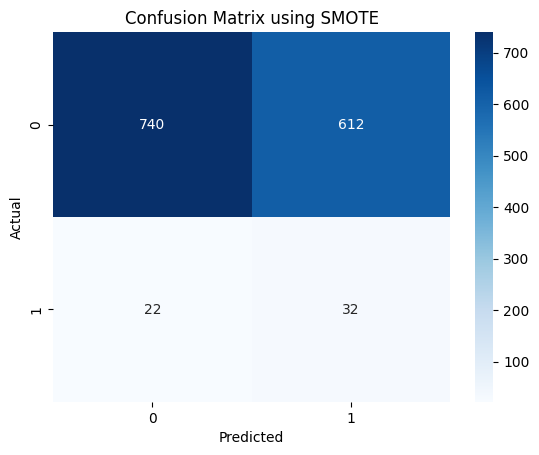

BorderlineSMOTE


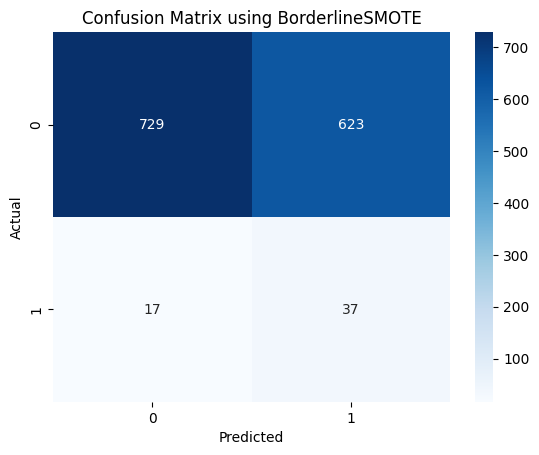

ADASYN


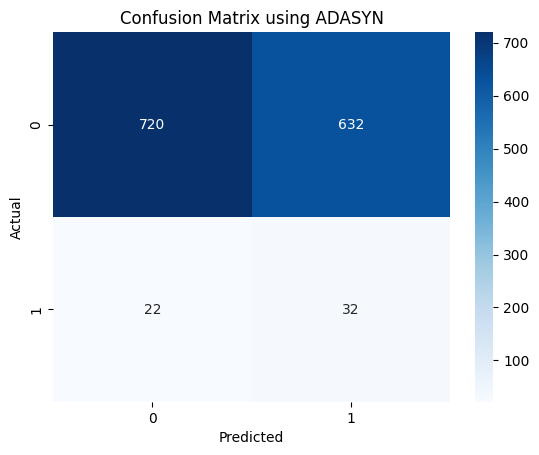

SVMSMOTE


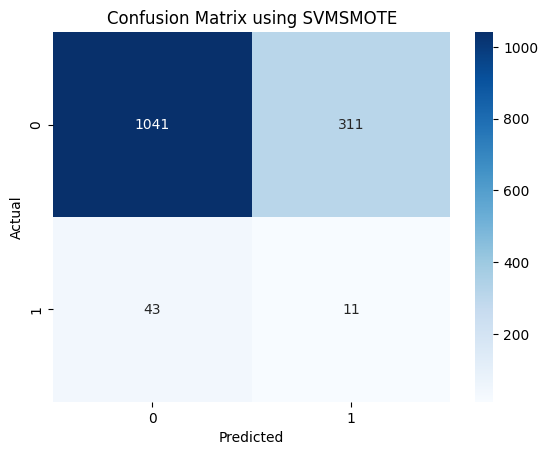

SMOTEENN


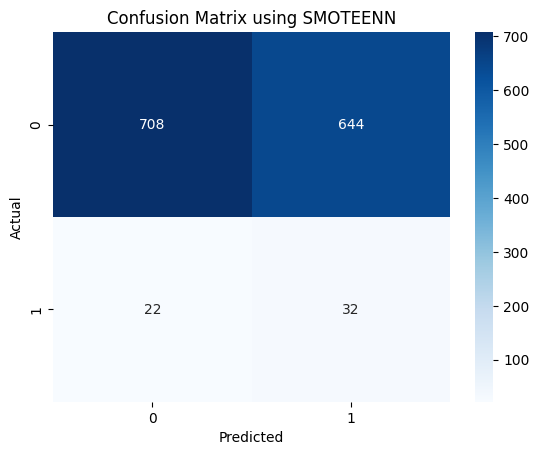

SMOTETomek


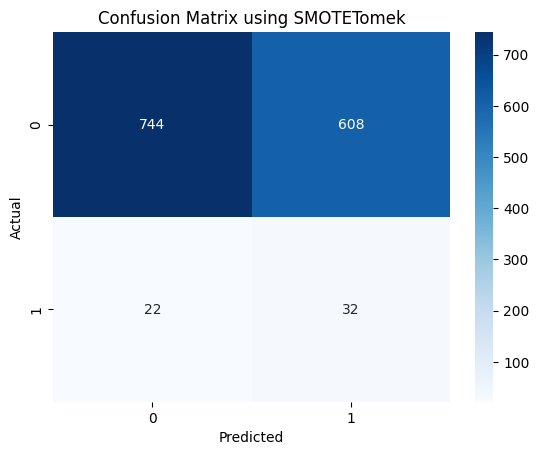

In [ ]:
#confusion matrix plot
for x in cm_lr_ga:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

Logistic Regression with PSO

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression


resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_lr_pso = []
cm_lr_pso=[]

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


def objective_function(params):
    C_values = params[:, 0]  # 'C'
    max_iters = params[:, 1]  # 'max_iter'
    scores = []
    for c, mi in zip(C_values, max_iters):
        try:
            clf = LogisticRegression(C=c, solver='liblinear', max_iter=int(mi))
            score = cross_val_score(clf, X_resampled, y_resampled, cv=cv, scoring='f1').mean()
        except Exception:
            score = 0
        scores.append(-score)  # minimize negative f1
    return np.array(scores)


#Resample the training data
for name, sampler in resamplers.items():
    print(f"\n{name}...")

    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)



    # PSO bounds and initialization
    bounds = (np.array([0.001, 100]), np.array([10.0, 1000]))  # 'C' and 'max_iter'
    optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options={'c1': 0.5, 'c2': 0.3, 'w': 0.9}, bounds=bounds)

    try:
        best_cost, best_pos = optimizer.optimize(objective_function, iters=10)

        model_pso= LogisticRegression(C=best_pos[0], solver='liblinear', max_iter=int(best_pos[1]))
        model_pso.fit(X_resampled, y_resampled)


        y_pred = model_pso.predict(X_test)
        y_prob = model_pso.predict_proba(X_test)[:, 1]


        # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_lr_pso.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc,
            'Params': f"C={best_pos[0]:.4f}, max_iter={int(best_pos[1])}"
        })

        cm_lr_pso.append({name:cm})

    except Exception as e:
        print(f"PSO failed for {name}: {e}")


2025-08-13 06:58:14,813 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



SMOTE...


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-0.617
2025-08-13 06:58:51,740 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.6174308558388336, best pos: [  9.85702914 497.47274958]
2025-08-13 06:58:51,895 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



ADASYN...


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-0.63
2025-08-13 06:59:29,681 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.6299925838511075, best pos: [  9.86562196 343.984176  ]
2025-08-13 06:59:29,828 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



BorderlineSMOTE...


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-0.68
2025-08-13 07:00:12,849 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.6800984624843112, best pos: [  9.10669503 722.35788199]



SVMSMOTE...


2025-08-13 07:00:13,353 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-0.64
2025-08-13 07:00:58,292 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.6402808248768433, best pos: [  9.82980896 754.94654626]



SMOTEENN...


2025-08-13 07:00:59,393 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-0.729
2025-08-13 07:01:34,818 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.7285716324960545, best pos: [1.05249239e-01 3.62995084e+02]



SMOTETomek...


2025-08-13 07:01:35,811 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-0.618
2025-08-13 07:02:14,213 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.6180302094991363, best pos: [  9.85699343 175.7912316 ]


In [ ]:
# Create DataFrame
results_df_lr_pso = pd.DataFrame(results_lr_pso)

# Round for readability
results_df_lr_pso = results_df_lr_pso.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_lr_pso)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.5512     0.0499                0.5926       0.5496   
1           ADASYN    0.5334     0.0480                0.5926       0.5311   
2  BorderlineSMOTE    0.5455     0.0561                0.6852       0.5399   
3         SVMSMOTE    0.7482     0.0342                0.2037       0.7700   
4         SMOTEENN    0.0861     0.0396                0.9815       0.0503   
5       SMOTETomek    0.5512     0.0499                0.5926       0.5496   

   F1 Score  ROC AUC                  Params  
0    0.0921   0.6047  C=9.8570, max_iter=497  
1    0.0889   0.6214  C=9.8656, max_iter=343  
2    0.1038   0.6881  C=9.1067, max_iter=722  
3    0.0585   0.5196  C=9.8298, max_iter=754  
4    0.0762   0.4885  C=0.1052, max_iter=362  
5    0.0921   0.6044  C=9.8570, max_iter=175

SMOTE


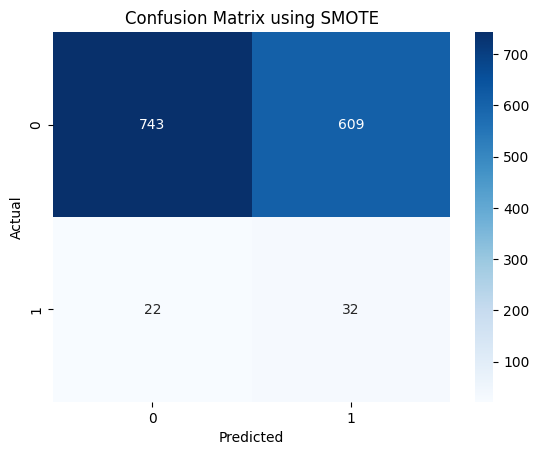

ADASYN


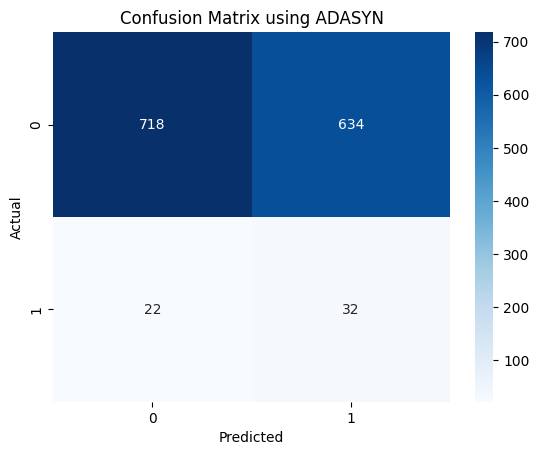

BorderlineSMOTE


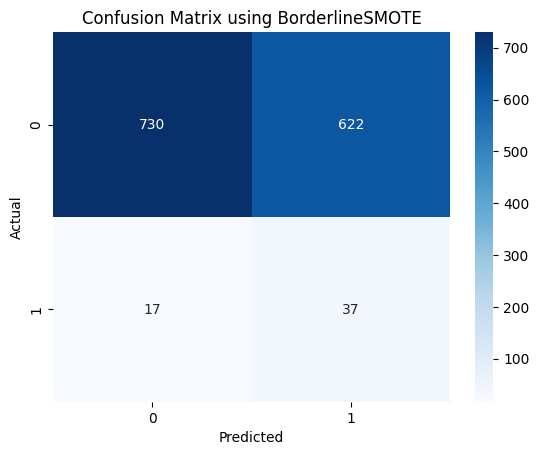

SVMSMOTE


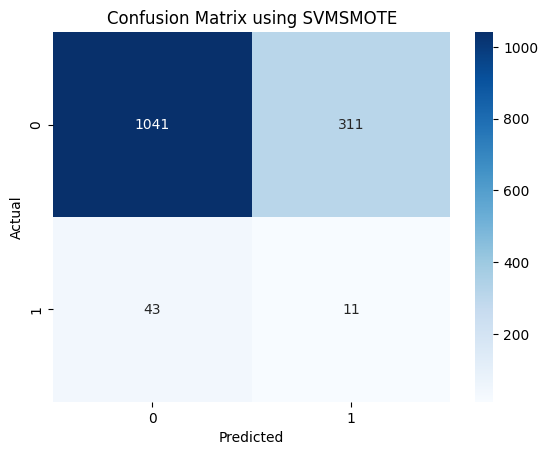

SMOTEENN


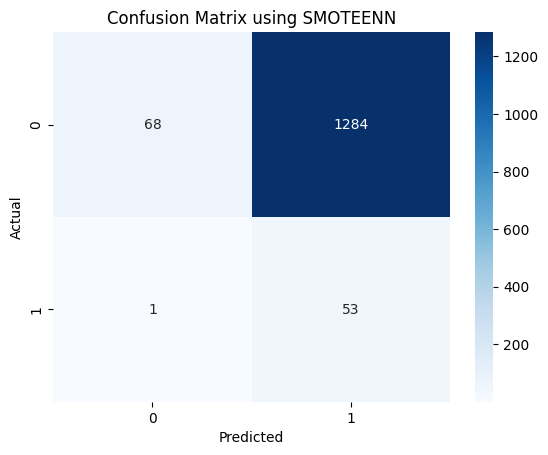

SMOTETomek


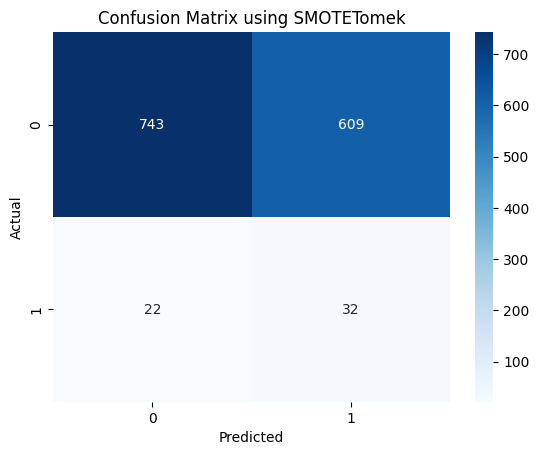

In [ ]:
#confusion matrix plot
for x in cm_lr_pso:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

**SVM**

In [ ]:
from sklearn.svm import SVC
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

In [ ]:
# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, stratify=y, test_size=0.2, random_state=42)

# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_svm = []
cm_svm=[]
roc_svm = {}
shap_values_svm = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        pipeline = Pipeline([
               ('scaler', StandardScaler()),
               ('resampler', sampler),
               ('model', SVC(class_weight='balanced', kernel='rbf', C=.1, probability=True, random_state=42))])

        pipeline.fit(X_train, y_train)

        # Predict with optimal threshold
        y_pred = pipeline.predict(X_test)
        y_prob = pipeline.predict_proba(X_test)[:, 1]



        # Evaluate

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_svm.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_svm.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_svm[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(pipeline)
        shap_values = explainer.shap_values(X_test)
        shap_values_svm.append({name:shap_values})'''

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_svm = pd.DataFrame(results_svm)

# Round for readability
results_df_svm = results_df_svm.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_svm)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.5967     0.0675                0.7407       0.5910   
1  BorderlineSMOTE    0.6636     0.0698                0.6296       0.6649   
2           ADASYN    0.5946     0.0671                0.7407       0.5888   
3         SVMSMOTE    0.6515     0.0709                0.6667       0.6509   
4         SMOTEENN    0.5946     0.0686                0.7593       0.5880   
5       SMOTETomek    0.5967     0.0675                0.7407       0.5910   

   F1 Score  ROC AUC  
0    0.1236   0.7312  
1    0.1257   0.7322  
2    0.1231   0.7288  
3    0.1281   0.7319  
4    0.1258   0.7337  
5    0.1236   0.7312

SMOTE


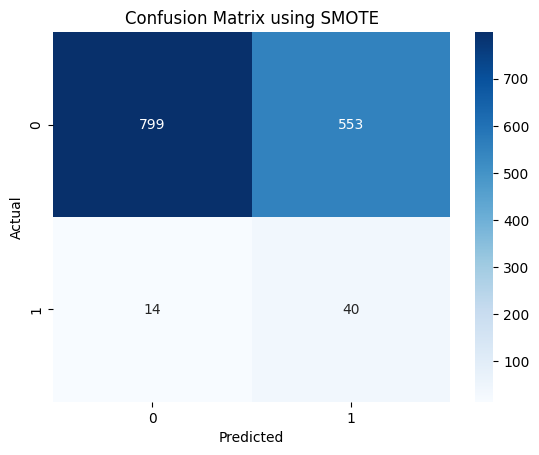

BorderlineSMOTE


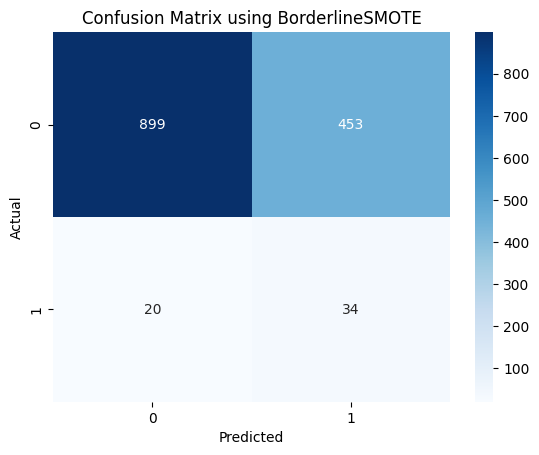

ADASYN


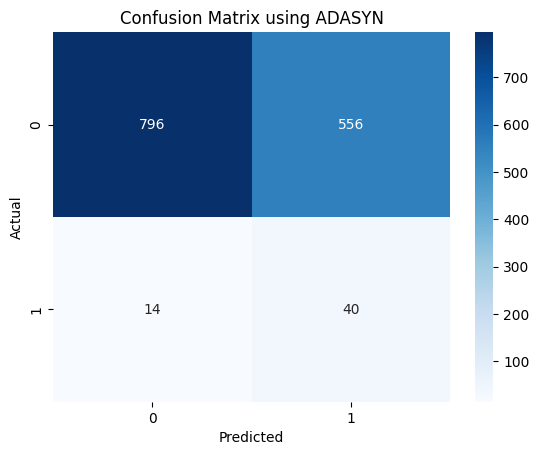

SVMSMOTE


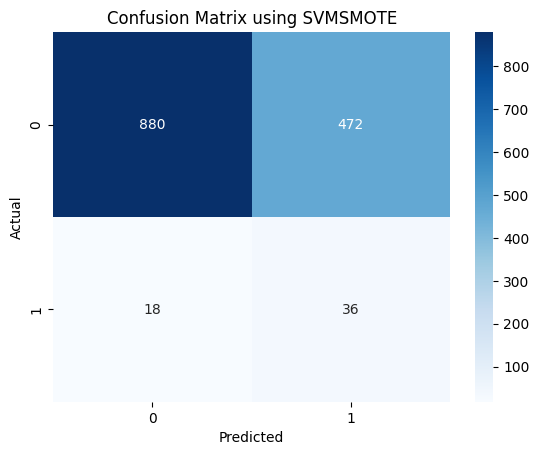

SMOTEENN


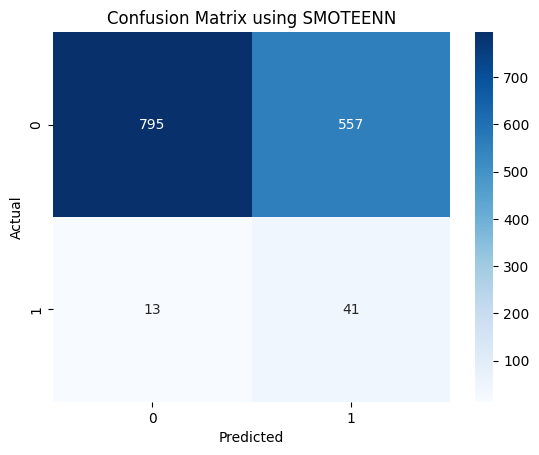

SMOTETomek


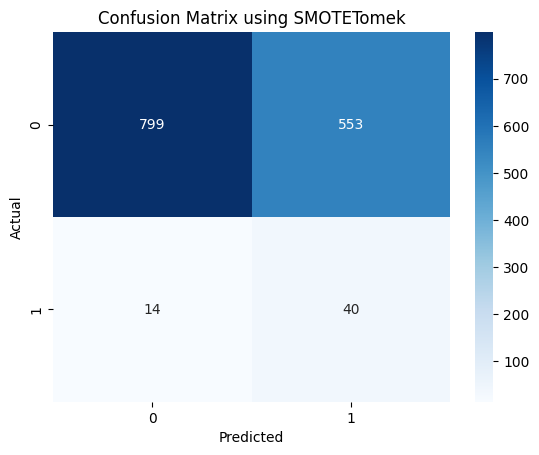

In [ ]:
#confusion matrix plot
for x in cm_svm:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

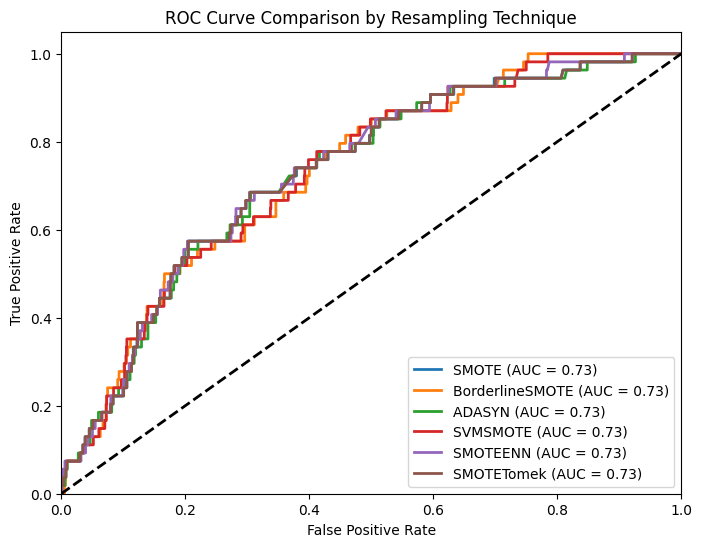

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_svm.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize scaler
scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)


In [ ]:
# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_rf = []
cm_rf=[]
roc_rf = {}
shap_values_rf = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        X_res, y_res = sampler.fit_resample(X_train, y_train)

        # Train model
        model = RandomForestClassifier(class_weight="balanced", random_state=42)
        model.fit(X_res, y_res)

        # Evaluate
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob > 0.3).astype(int)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_rf.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_rf.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_rf[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        '''explainer = shap.TreeExplainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_rf.append({name:shap_values})'''

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")




Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_rf = pd.DataFrame(results_rf)

# Round for readability
results_df_rf = results_df_rf.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_rf)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.8791     0.1778                0.5926       0.8905   
1  BorderlineSMOTE    0.9026     0.1680                0.3889       0.9231   
2           ADASYN    0.8762     0.1667                0.5556       0.8891   
3         SVMSMOTE    0.9260     0.2642                0.5185       0.9423   
4         SMOTEENN    0.8080     0.1301                0.7037       0.8121   
5       SMOTETomek    0.8869     0.1965                0.6296       0.8972   

   F1 Score  ROC AUC  
0    0.2735   0.8675  
1    0.2346   0.8348  
2    0.2564   0.8553  
3    0.3500   0.8577  
4    0.2197   0.8486  
5    0.2996   0.8703

SMOTE


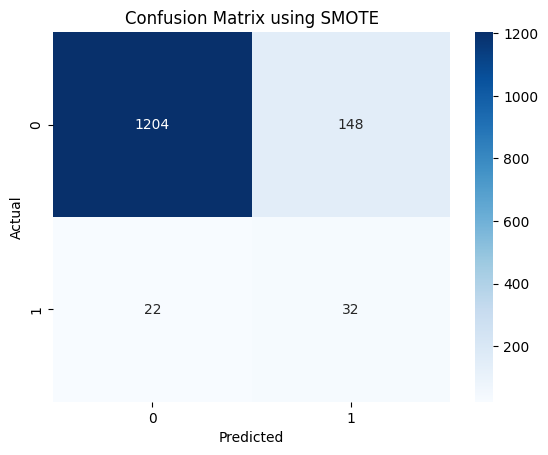

BorderlineSMOTE


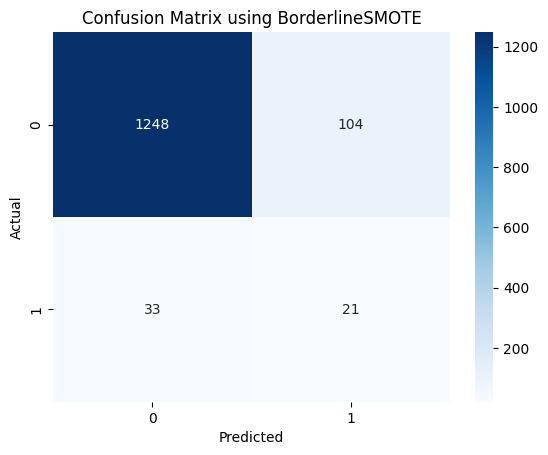

ADASYN


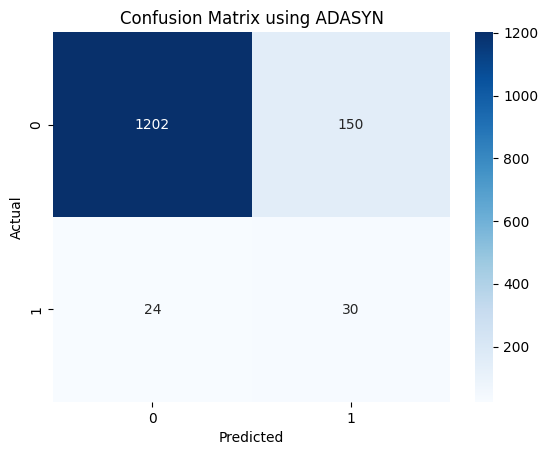

SVMSMOTE


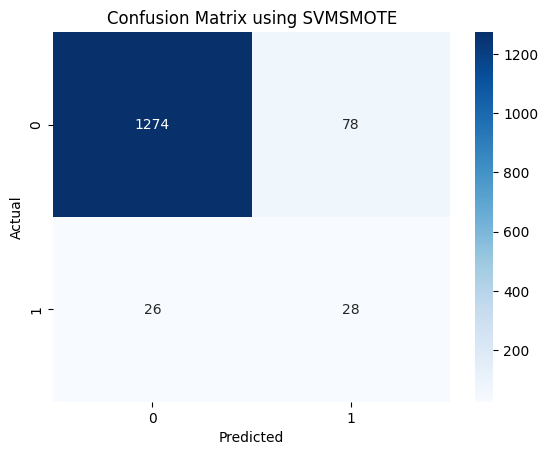

SMOTEENN


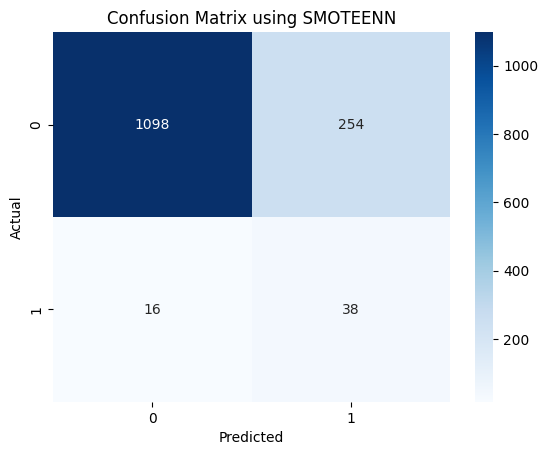

SMOTETomek


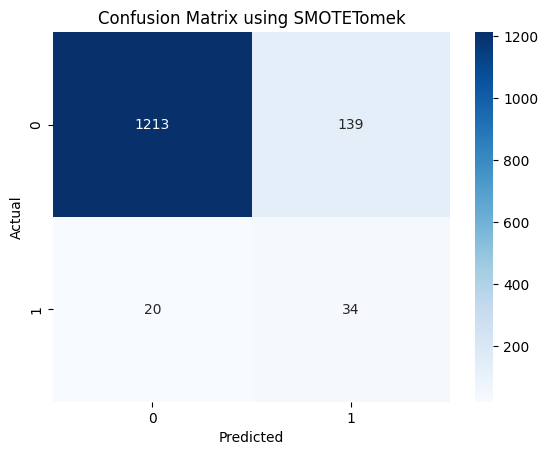

In [ ]:
#confusion matrix plot
for x in cm_rf:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

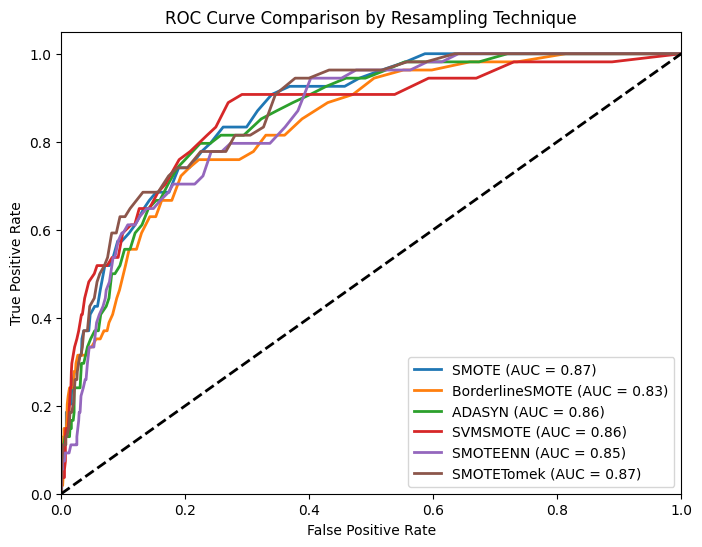

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_rf.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**Random Forest with GA**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize scaler
scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)


In [ ]:
# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define resampling techniques
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

# Store results
results_rf_ga = []
cm_rf_ga=[]
roc_rf_ga = {}


# Loop over each resampling method
for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)


        # Genetic Algorithm for Hyperparameter Optimization

        from deap import base, creator, tools, algorithms

        if not hasattr(creator, "FitnessMax"):
            creator.create("FitnessMax", base.Fitness, weights=(1.0,))

        if not hasattr(creator, "Individual"):
            creator.create("Individual", list, fitness=creator.FitnessMax)

        def create_individual():
            return [random.randint(10, 100), random.randint(5, 20)]  # n_estimator, max_depth

        toolbox = base.Toolbox()
        toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)

        def evaluate(ind):
            n_estimators, max_depth = ind
            try:
                model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, class_weight='balanced', random_state=42)
                score = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='f1').mean()
            except Exception:
                score = 0
            return (score,)

        toolbox.register("evaluate", evaluate)
        toolbox.register("mate", tools.cxTwoPoint)
        toolbox.register("mutate", tools.mutUniformInt, low=[10, 5], up=[100, 20], indpb=0.2)
        toolbox.register("select", tools.selTournament, tournsize=3)

        pop = toolbox.population(n=5)
        algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=3, verbose=False)

        best_ind = tools.selBest(pop, k=1)[0]
        best_n, best_d = best_ind

        # Train model
        model_ga = RandomForestClassifier(n_estimators=best_n, max_depth=best_d, class_weight='balanced', random_state=42)
        model_ga.fit(X_resampled,  y_resampled)

        # Predict on original test set
        y_pred = model_ga.predict(X_test)
        y_prob = model_ga.predict_proba(X_test)[:, 1]


        # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_rf_ga.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc,
            'Params': f"n_estimators= {best_n},max_depth={best_d}"
        })

        cm_rf_ga.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_rf_ga[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

    except Exception as e:
        print(f"❌ {name} failed: {e}")



SMOTE...

BorderlineSMOTE...

ADASYN...

SVMSMOTE...

SMOTEENN...

SMOTETomek...


In [ ]:
# Create DataFrame
results_df_rf_ga = pd.DataFrame(results_rf_ga)

# Round for readability
results_df_rf_ga = results_df_rf_ga.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_rf_ga)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.9410     0.1915                0.1667       0.9719   
1  BorderlineSMOTE    0.9474     0.3148                0.3148       0.9726   
2           ADASYN    0.9431     0.2500                0.2407       0.9712   
3         SVMSMOTE    0.9545     0.3333                0.1852       0.9852   
4         SMOTEENN    0.9054     0.1890                0.4444       0.9238   
5       SMOTETomek    0.9353     0.2597                0.3704       0.9578   

   F1 Score  ROC AUC                         Params  
0    0.1782   0.8529  n_estimators= 87,max_depth=20  
1    0.3148   0.8035  n_estimators= 51,max_depth=19  
2    0.2453   0.8482  n_estimators= 59,max_depth=18  
3    0.2381   0.8261  n_estimators= 21,max_depth=19  
4    0.2652   0.8358  n_estimators= 43,max_depth=18  
5    0.3053   0.8703  n_estimators= 97,max_depth=15

SMOTE


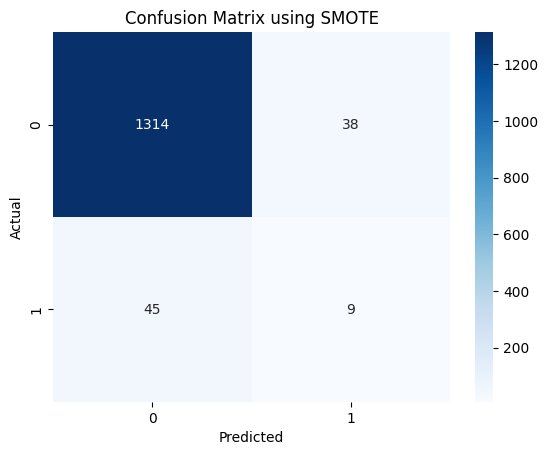

BorderlineSMOTE


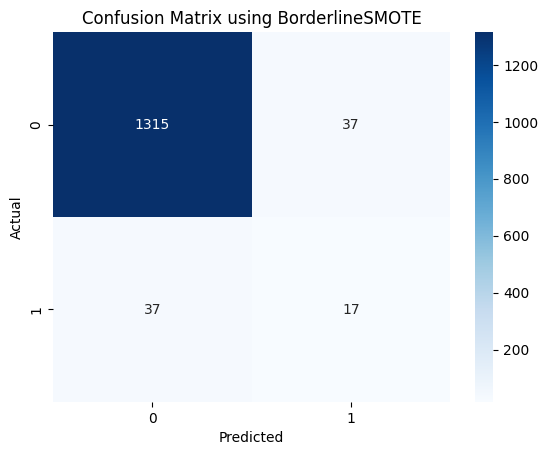

ADASYN


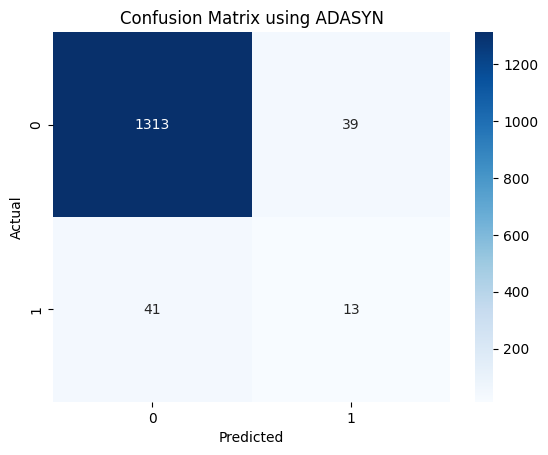

SVMSMOTE


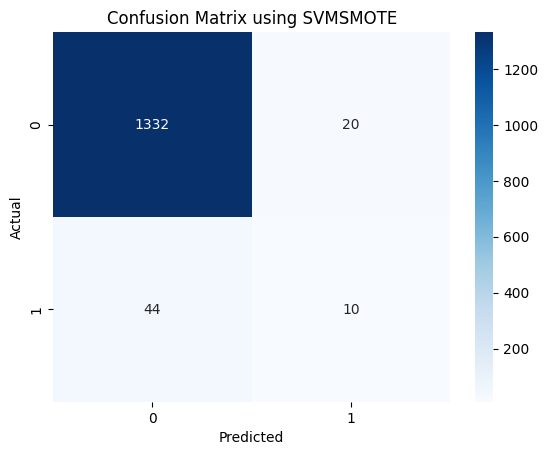

SMOTEENN


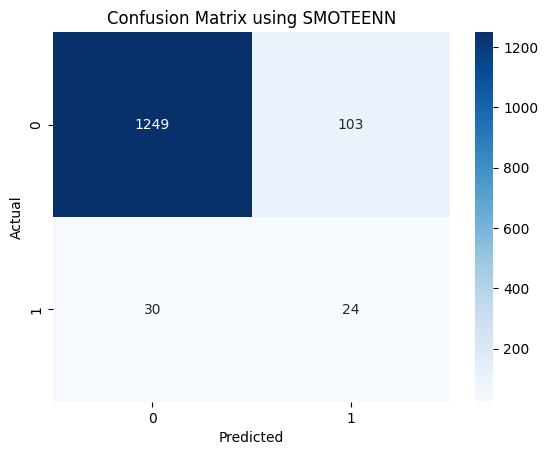

SMOTETomek


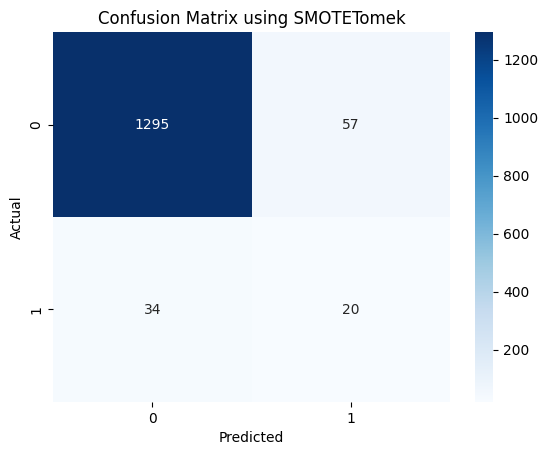

In [ ]:
#confusion matrix plot
for x in cm_rf_ga:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

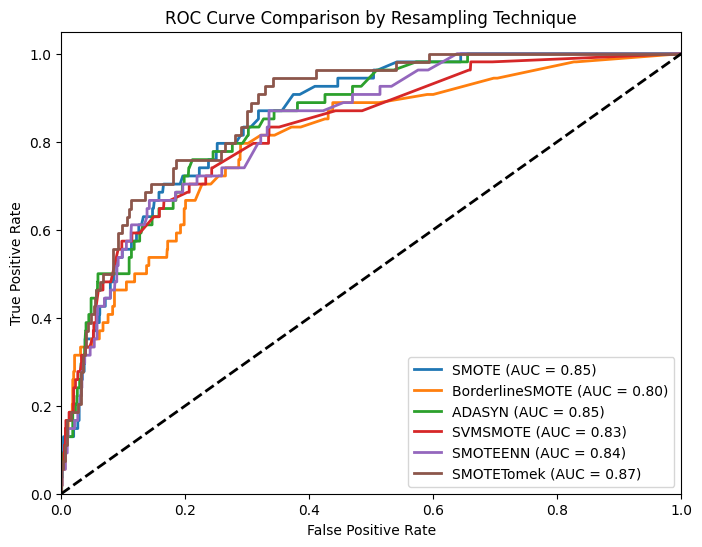

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_rf_ga.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**Random Forest with PSO**

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize scaler
scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)


In [ ]:
# Split the imbalanced data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier


resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_rf_pso = []
cm_rf_pso=[]
roc_rf_pso= {}



from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


def objective_function(params):
    n_estimators = params[:, 0].astype(int)
    max_depths = params[:, 1].astype(int)
    scores = []
    for i in range(len(n_estimators)):
        try:
            clf = RandomForestClassifier(n_estimators=n_estimators[i], max_depth=max_depths[i], random_state=42, n_jobs=-1)
            score = cross_val_score(clf, X_resampled, y_resampled, cv=cv, scoring='f1', n_jobs=-1).mean()
        except Exception as e:
            print(f"Error in fold {i}: {e}")
            score = 0
        scores.append(-score)
    return np.array(scores)


#Resample the training data
for name, sampler in resamplers.items():
    print(f"\n{name}...")

    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)



    # Bounds for PSO:  n_estimators [10, 100], max_depth [5, 20]
    bounds = (np.array([10, 5]), np.array([100, 20]))

    optimizer = ps.single.GlobalBestPSO(n_particles=5, dimensions=2, options={'c1': 0.5, 'c2': 0.3, 'w': 0.9}, bounds=bounds)

    try:
        best_cost, best_pos = optimizer.optimize(objective_function, iters=5)

        best_n_estimators = int(best_pos[0])
        best_max_depth = int(best_pos[1])

        model_pso=  RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42, n_jobs=-1)
        model_pso.fit(X_resampled, y_resampled)


        y_pred = model_pso.predict(X_test)
        y_prob = model_pso.predict_proba(X_test)[:, 1]


        # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_rf_pso.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc,
            'Params': f"n_estimator={best_n_estimators}, max_depth={best_max_depth }"
        })

        cm_rf_pso.append({name:cm})

         # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_rf_pso[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

    except Exception as e:
        print(f"PSO failed for {name}: {e}")


2025-08-13 07:32:33,880 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



SMOTE...


pyswarms.single.global_best: 100%|██████████|5/5, best_cost=-0.976
2025-08-13 07:38:11,362 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9759908598507293, best pos: [61.95974087 19.86476641]
2025-08-13 07:38:15,858 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



ADASYN...


pyswarms.single.global_best: 100%|██████████|5/5, best_cost=-0.978
2025-08-13 07:48:23,696 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9777918773876391, best pos: [78.93354269 19.64517469]
2025-08-13 07:48:29,464 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



BorderlineSMOTE...


pyswarms.single.global_best: 100%|██████████|5/5, best_cost=-0.971
2025-08-13 07:52:13,096 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9709150083302657, best pos: [39.88954355 19.16224098]



SVMSMOTE...


2025-08-13 07:52:16,624 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|5/5, best_cost=-0.983
2025-08-13 08:00:36,668 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9834935413336151, best pos: [87.54168903 19.96795916]



SMOTEENN...


2025-08-13 08:00:44,563 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|5/5, best_cost=-0.972
2025-08-13 08:05:14,244 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9717743120049462, best pos: [56.61840243 19.77768184]



SMOTETomek...


2025-08-13 08:05:18,689 - pyswarms.single.global_best - INFO - Optimize for 5 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|5/5, best_cost=-0.977
2025-08-13 08:12:42,065 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9774348040018491, best pos: [62.5675426  19.69466034]


In [ ]:
# Create DataFrame
results_df_rf_pso = pd.DataFrame(results_rf_pso)

# Round for readability
results_df_rf_pso = results_df_rf_pso.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_rf_pso)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.9438     0.2642                0.2593       0.9712   
1           ADASYN    0.9474     0.2826                0.2407       0.9756   
2  BorderlineSMOTE    0.9431     0.2759                0.2963       0.9689   
3         SVMSMOTE    0.9587     0.4231                0.2037       0.9889   
4         SMOTEENN    0.9097     0.1826                0.3889       0.9305   
5       SMOTETomek    0.9438     0.2642                0.2593       0.9712   

   F1 Score  ROC AUC                        Params  
0    0.2617   0.8611  n_estimator=61, max_depth=19  
1    0.2600   0.8580  n_estimator=78, max_depth=19  
2    0.2857   0.8008  n_estimator=39, max_depth=19  
3    0.2750   0.8540  n_estimator=87, max_depth=19  
4    0.2485   0.8208  n_estimator=56, max_depth=19  
5    0.2617   0.8605  n_estimator=62, max_depth=19

SMOTE


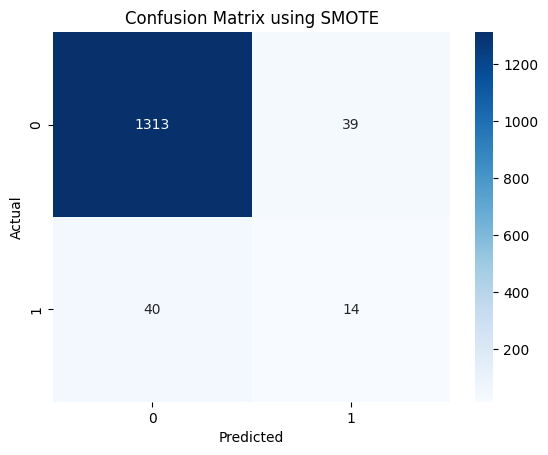

ADASYN


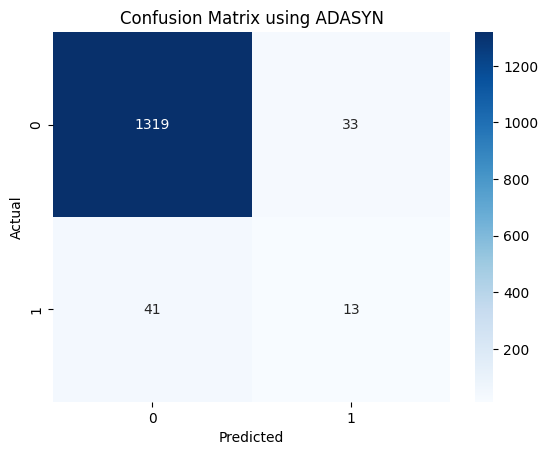

BorderlineSMOTE


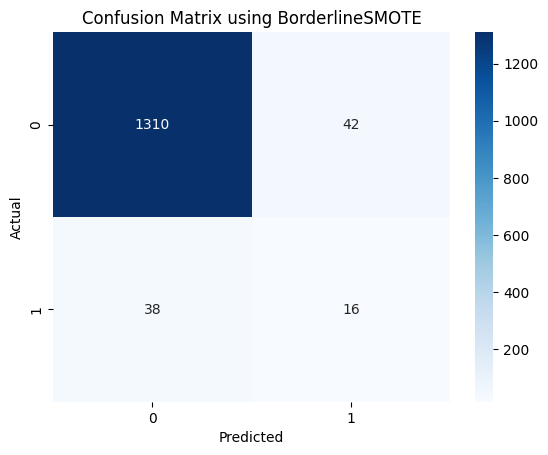

SVMSMOTE


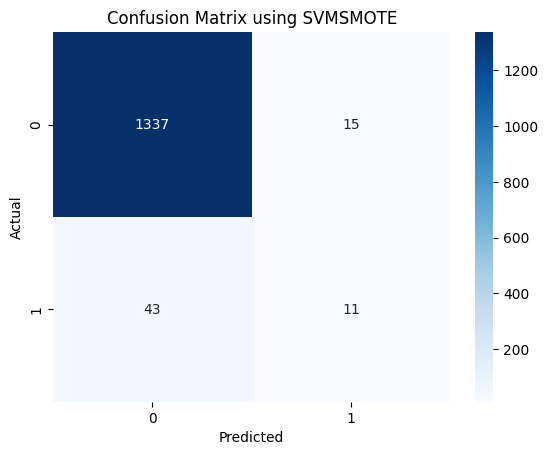

SMOTEENN


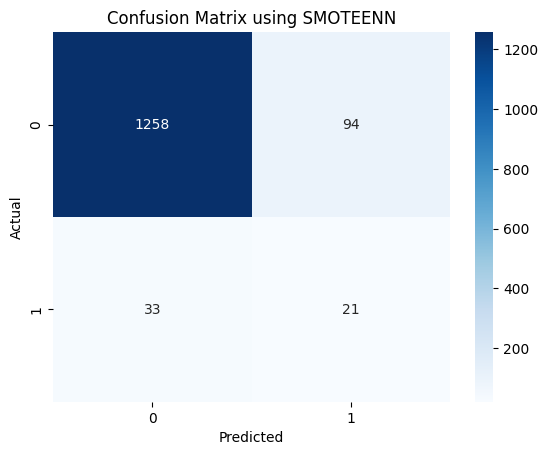

SMOTETomek


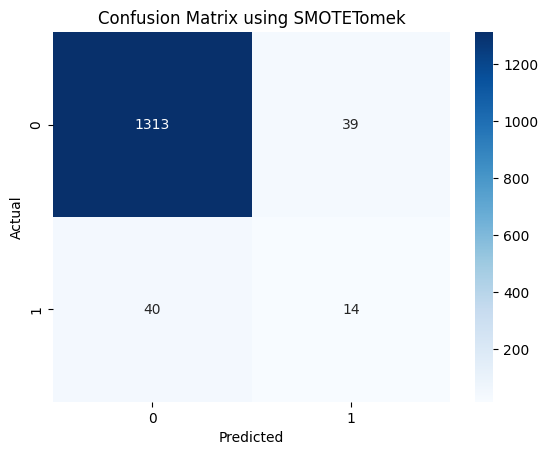

In [ ]:
#confusion matrix plot
for x in cm_rf_pso:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

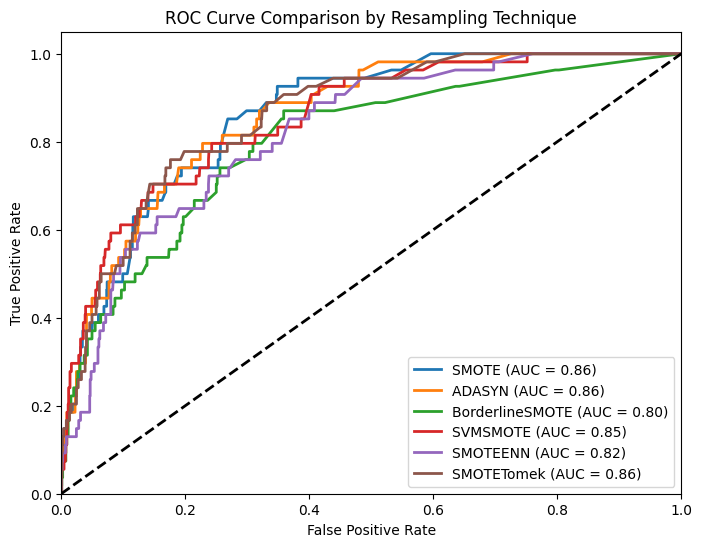

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_rf_pso.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**XGBoost**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [ ]:
from sklearn.preprocessing import MinMaxScaler


# Initialize scaler
scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)
X_scaled = pd.DataFrame(X_scaled, columns=X_imputed.columns)


In [ ]:
# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [ ]:
# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_xgb = []
cm_xgb=[]
roc_xgb = {}
shap_values_xgb = []


for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:

        X_res, y_res = sampler.fit_resample(X_train, y_train)

        # Train model
        model = XGBClassifier(eval_metric='logloss',
            n_estimators=100,
            max_depth=5,
            learning_rate=0.1,
            random_state=42
        )
        model.fit(X_res, y_res)

        # Evaluate
        y_prob = model.predict_proba(X_test)[:, 1]
        y_pred = (y_prob >= 0.1).astype(int)

        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_xgb.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_xgb.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_xgb[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_xgb.append({name:shap_values})

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")



Using SMOTE...
✅ SMOTE completed

Using BorderlineSMOTE...
✅ BorderlineSMOTE completed

Using ADASYN...
✅ ADASYN completed

Using SVMSMOTE...
✅ SVMSMOTE completed

Using SMOTEENN...
✅ SMOTEENN completed

Using SMOTETomek...
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_xgb = pd.DataFrame(results_xgb)

# Round for readability
results_df_xgb = results_df_xgb.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_xgb)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.7074     0.0906                0.8000       0.7040   
1  BorderlineSMOTE    0.7729     0.1130                0.7867       0.7724   
2           ADASYN    0.7074     0.0906                0.8000       0.7040   
3         SVMSMOTE    0.7937     0.1154                0.7200       0.7965   
4         SMOTEENN    0.6866     0.0896                0.8533       0.6804   
5       SMOTETomek    0.7103     0.0902                0.7867       0.7075   

   F1 Score  ROC AUC  
0    0.1628   0.8574  
1    0.1977   0.8551  
2    0.1628   0.8561  
3    0.1989   0.8557  
4    0.1622   0.8616  
5    0.1619   0.8586

SMOTE


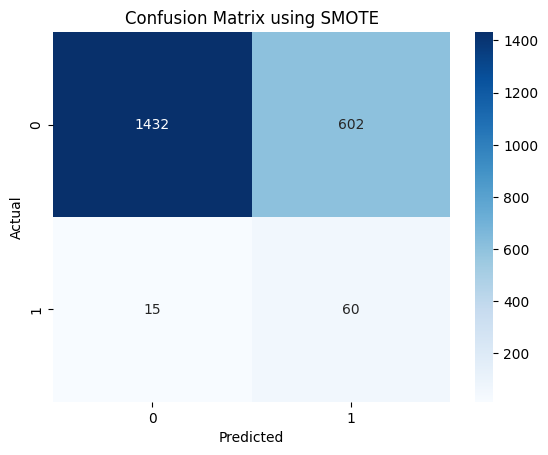

BorderlineSMOTE


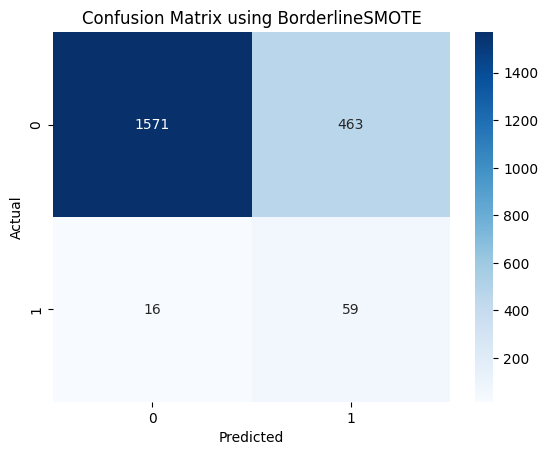

ADASYN


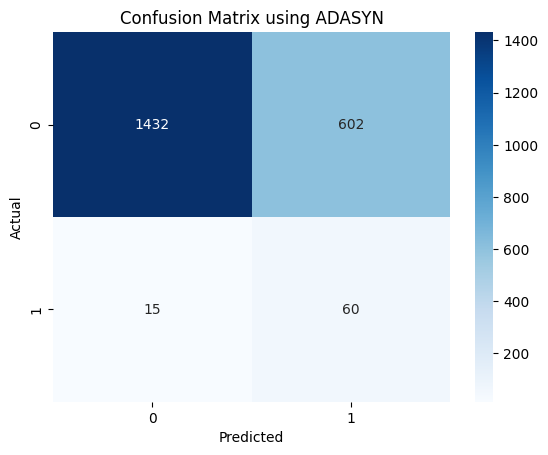

SVMSMOTE


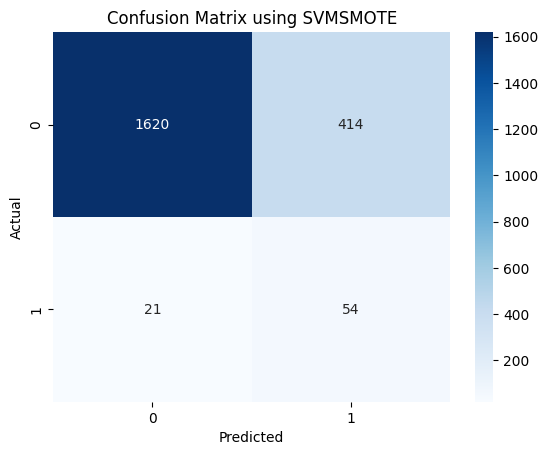

SMOTEENN


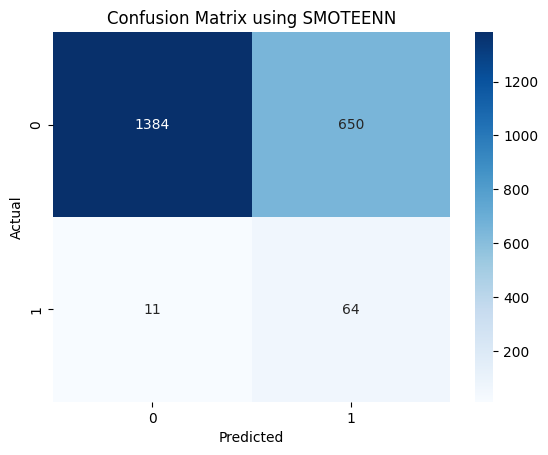

SMOTETomek


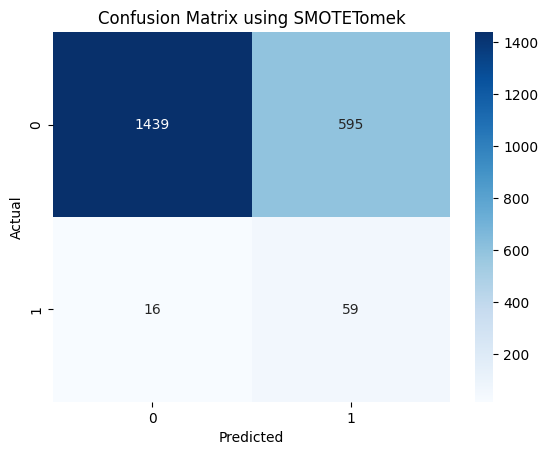

In [ ]:
#confusion matrix plot
for x in cm_xgb:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

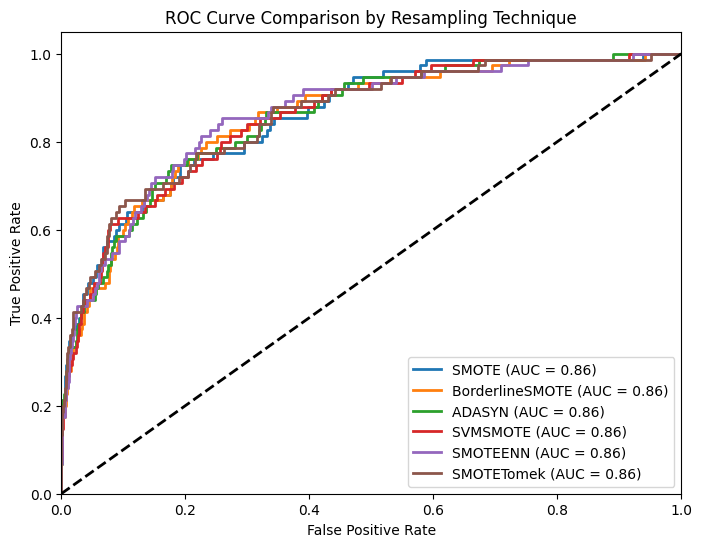

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_xgb.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

SMOTE


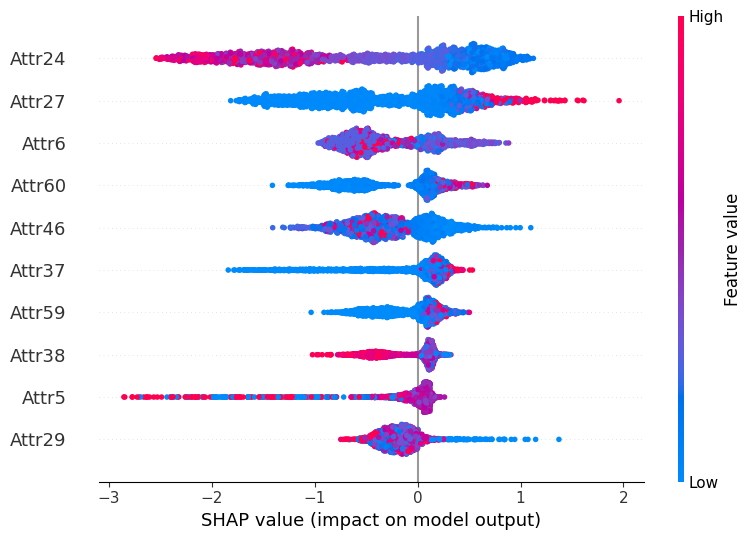

BorderlineSMOTE


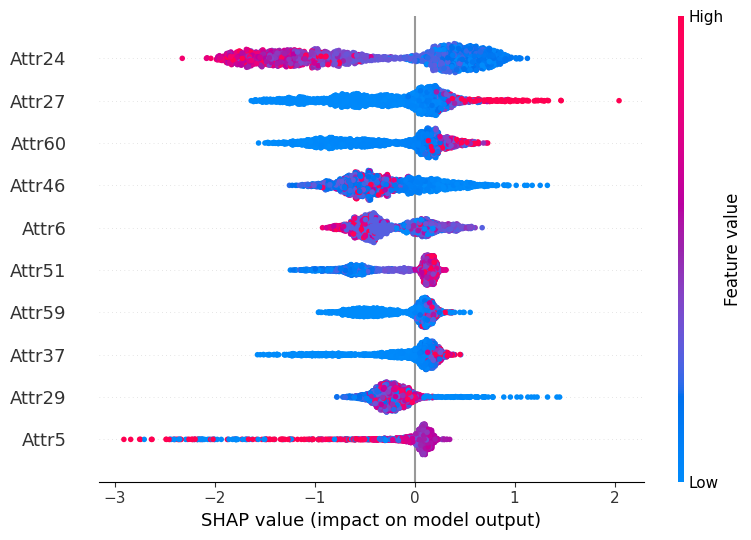

ADASYN


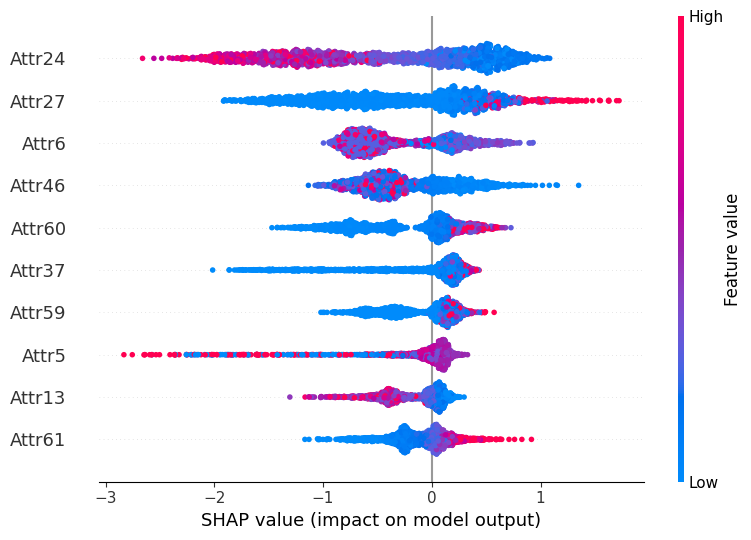

SVMSMOTE


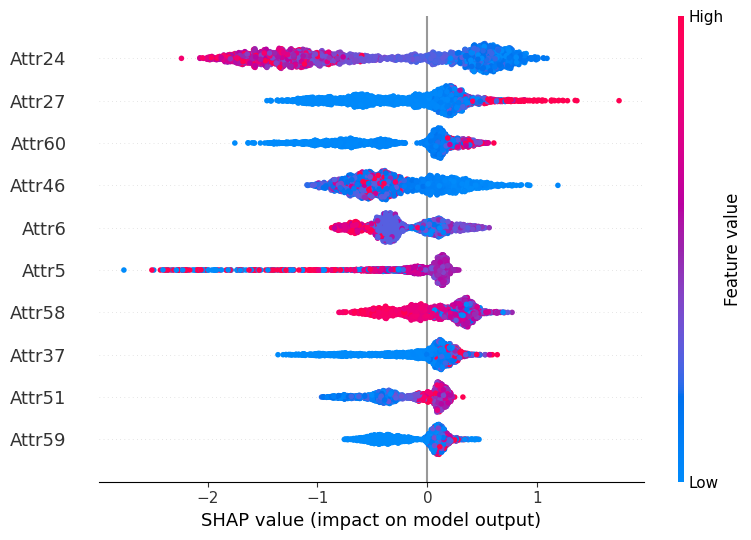

SMOTEENN


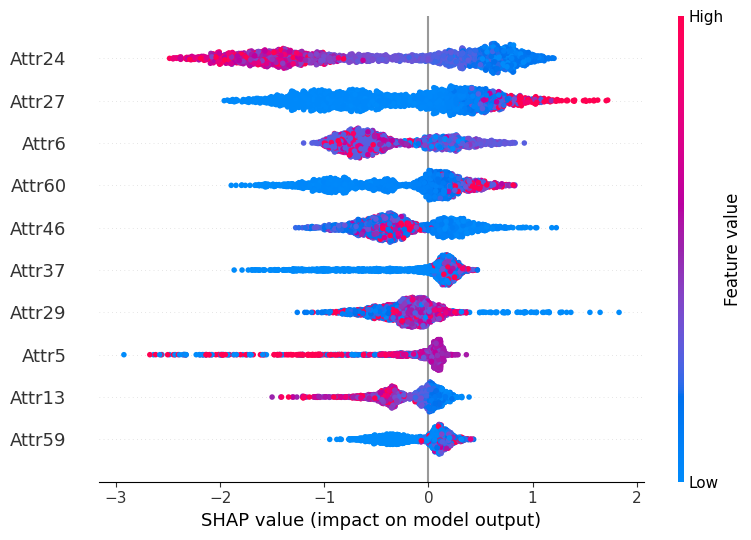

SMOTETomek


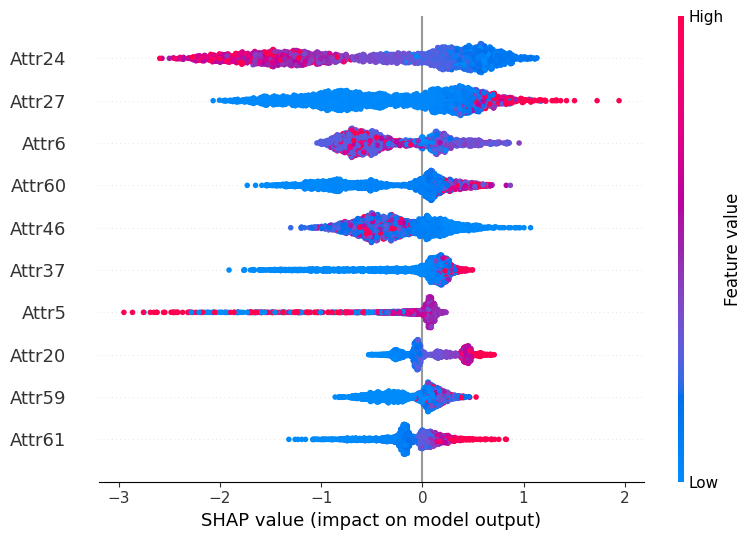

In [ ]:
for x in shap_values_xgb:
    for k in x:
        print(k)
    shap.summary_plot(x[k], X_test, max_display=10)



**XGB with GA**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# 2. Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb


# Define resampling techniques
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

# Store results
results_xgb_ga = []
cm_xgb_ga=[]
roc_xgb_ga = {}



# Loop over each resampling method
for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)


        # Genetic Algorithm for Hyperparameter Optimization

        from deap import base, creator, tools, algorithms

        if not hasattr(creator, "FitnessMax"):
            creator.create("FitnessMax", base.Fitness, weights=(1.0,))

        if not hasattr(creator, "Individual"):
            creator.create("Individual", list, fitness=creator.FitnessMax)

        def create_individual():
            return [random.randint(1, 10), random.uniform(0.01, 1), random.randint(100, 500)]  # max_depth, learning_rate, n_estimators

        toolbox = base.Toolbox()
        toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)

        def evaluate(ind):
            max_depth, learning_rate, n_estimators = ind
            try:
                model = xgb.XGBClassifier(max_depth=max_depth,learning_rate=learning_rate, n_estimators=n_estimators, use_label_encoder=False, eval_metric='logloss',verbosity=0,random_state=42)
                score = cross_val_score(model, X1_resampled, y1_resampled, cv=5, scoring='f1').mean()
            except Exception:
                score = 0
            return (score,)

        toolbox.register("evaluate", evaluate)
        toolbox.register("mate", tools.cxBlend, alpha=0.5)
        toolbox.register("mutate", tools.mutGaussian, mu=1, sigma=1, indpb=0.2)
        toolbox.register("select", tools.selTournament, tournsize=3)

        pop = toolbox.population(n=5)
        algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=3, verbose=False)

        best_ind = tools.selBest(pop, k=1)[0]
        best_depth, best_lr, best_est = int(best_ind[0]), best_ind[1], int(best_ind[2])


        # Train model
        model_ga =  xgb.XGBClassifier(max_depth=int(best_depth), learning_rate=best_lr, n_estimators=int(best_est), use_label_encoder=False, eval_metric='logloss', verbosity=0,random_state=42)
        model_ga.fit(X_resampled,  y_resampled)

        # Predict on original test set
        y_pred = model_ga.predict(X_test)
        y_prob = model_ga.predict_proba(X_test)[:, 1]


        # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_xgb_ga.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc,
            'Params': f"max_depth= {best_depth},learning_rate={best_lr:.4f},n_estimators={best_est}"
        })

        cm_xgb_ga.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_xgb_ga[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

    except Exception as e:
        print(f"❌ {name} failed: {e}")



SMOTE...
Before SMOTE: Counter({0.0: 5404, 1.0: 217})
After SMOTE: Counter({0.0: 5404, 1.0: 5404})

BorderlineSMOTE...
Before SMOTE: Counter({0.0: 5404, 1.0: 217})
After SMOTE: Counter({0.0: 5404, 1.0: 5404})

ADASYN...
Before SMOTE: Counter({0.0: 5404, 1.0: 217})
After SMOTE: Counter({0.0: 5404, 1.0: 5403})

SVMSMOTE...
Before SMOTE: Counter({0.0: 5404, 1.0: 217})
After SMOTE: Counter({0.0: 5404, 1.0: 5404})

SMOTEENN...
Before SMOTE: Counter({0.0: 5404, 1.0: 217})
After SMOTE: Counter({1.0: 5144, 0.0: 3964})

SMOTETomek...
Before SMOTE: Counter({0.0: 5404, 1.0: 217})
After SMOTE: Counter({0.0: 5381, 1.0: 5381})


In [ ]:
# Create DataFrame
results_df_xgb_ga = pd.DataFrame(results_xgb_ga)

# Round for readability
results_df_xgb_ga = results_df_xgb_ga.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_xgb_ga)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.9744     0.7419                0.4510       0.9941   
1  BorderlineSMOTE    0.9730     0.7097                0.4314       0.9934   
2           ADASYN    0.9623     0.4783                0.4314       0.9823   
3         SVMSMOTE    0.9701     0.6452                0.3922       0.9919   
4         SMOTEENN    0.9495     0.3485                0.4510       0.9683   
5       SMOTETomek    0.9388     0.2535                0.3529       0.9609   

   F1 Score  ROC AUC                                             Params  
0    0.5610   0.8881  max_depth= 5,learning_rate=0.2042,n_estimators...  
1    0.5366   0.8934  max_depth= 10,learning_rate=0.1146,n_estimator...  
2    0.4536   0.8392  max_depth= 2,learning_rate=0.7435,n_estimators...  
3    0.4878   0.8607  max_depth= 3,learning_rate=0.6699,n_estimators...  
4    0.3932   0.8690  max_depth= 8,learning_rate=0.5849,n_estimators...  
5    0.2951   0.8115  max_depth= 6,learning_rate=1.7449,n_estimators...

SMOTE


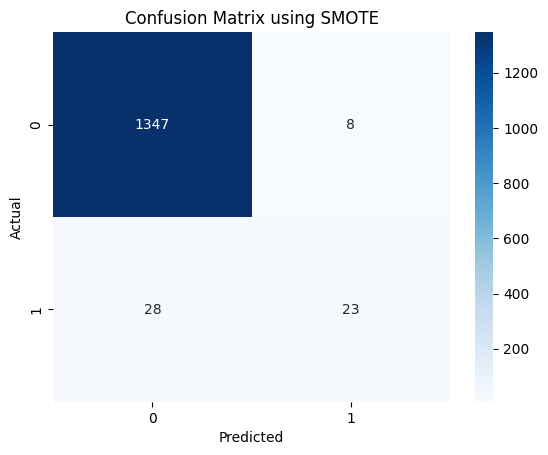

BorderlineSMOTE


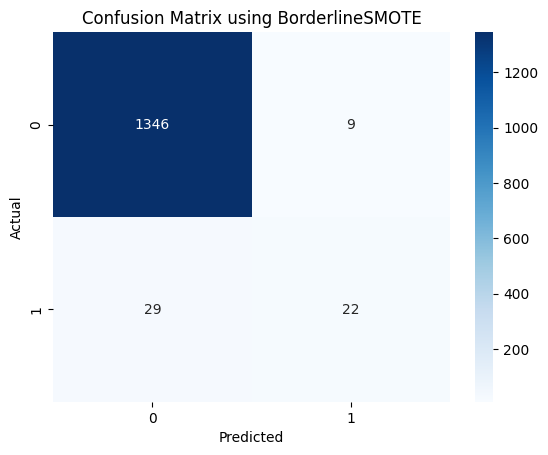

ADASYN


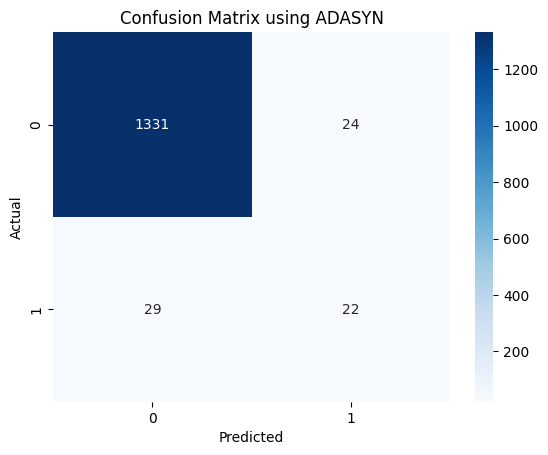

SVMSMOTE


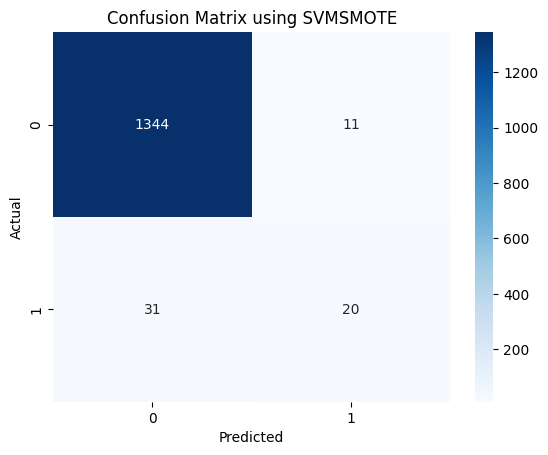

SMOTEENN


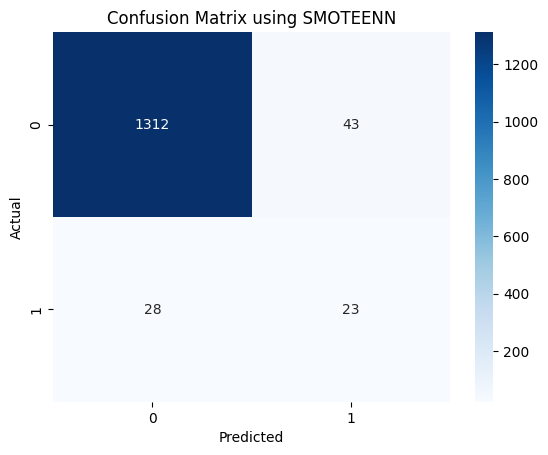

SMOTETomek


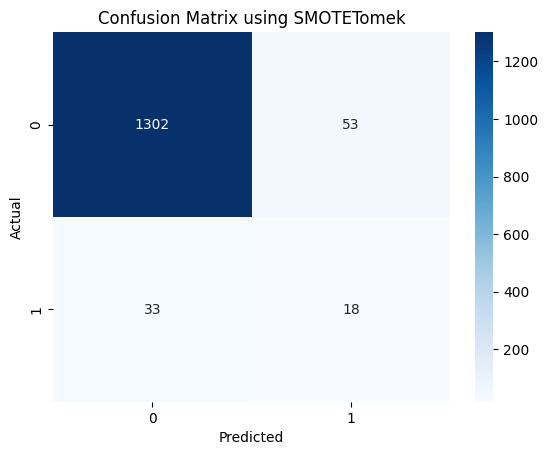

In [ ]:
#confusion matrix plot
for x in cm_xgb_ga:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

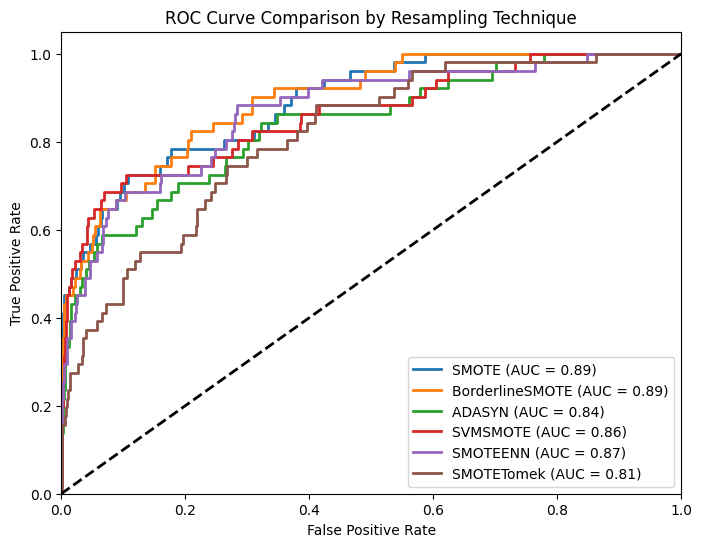

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_xgb_ga.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**XGB with PSO**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit on features and transform
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier


resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_xgb_pso = []
cm_xgb_pso=[]
roc_xgb_pso={}


from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


def objective_function(params):
    max_depths = params[:, 0].astype(int)
    learning_rates = params[:, 1]
    n_estimators = params[:, 2].astype(int)

    scores = []
    for i in range(len(max_depths)):
        try:
            clf = XGBClassifier(max_depth=max_depths[i], learning_rate=learning_rates[i], n_estimators=n_estimators[i],use_label_encoder=False,eval_metric='logloss',random_state=42,verbosity=0)
            score = cross_val_score(clf, X_resampled, y_resampled, cv=cv, scoring='f1', n_jobs=-1).mean()
        except Exception as e:
            print(f"Error in fold {i}: {e}")
            score = 0
        scores.append(-score)
    return np.array(scores)


#Resample the training data
for name, sampler in resamplers.items():
    print(f"\n{name}...")

    X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)



    # Bounds for PSO:  max_depth [1, 10], learning_rate [0.01, 1], n_estimators [100, 500]
    bounds = (np.array([1, 0.01, 100]), np.array([10, 1, 500]))


    optimizer = ps.single.GlobalBestPSO(n_particles=5, dimensions=3, options={'c1': 0.5, 'c2': 0.3, 'w': 0.9}, bounds=bounds)

    try:
        best_cost, best_pos = optimizer.optimize(objective_function, iters=10)

        best_max_depth = int(best_pos[0])
        best_learning_rate = best_pos[1]
        best_n_estimators = int(best_pos[2])

        model_pso=  XGBClassifier(max_depth=best_max_depth, learning_rate=best_learning_rate, n_estimators=best_n_estimators,use_label_encoder=False,eval_metric='logloss',random_state=42,verbosity=0)
        model_pso.fit(X_resampled, y_resampled)


        y_pred = model_pso.predict(X_test)
        y_prob = model_pso.predict_proba(X_test)[:, 1]


        # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_xgb_pso.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc,
            'Params': f'max_depth={best_max_depth}, learning_rate={best_learning_rate:.4f}, n_estimators={best_n_estimators}'
        })

        cm_xgb_pso.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_xgb_pso[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

    except Exception as e:
        print(f"PSO failed for {name}: {e}")


2025-08-13 08:47:30,288 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



SMOTE...


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-0.992
2025-08-13 08:56:56,435 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9916122595299633, best pos: [6.81193825e+00 1.90589463e-01 3.03605227e+02]
2025-08-13 08:57:00,389 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



ADASYN...


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-0.991
2025-08-13 09:06:15,556 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.991245909448593, best pos: [5.77094322e+00 2.06941672e-01 3.08921464e+02]
2025-08-13 09:06:18,571 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}



BorderlineSMOTE...


pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-0.99
2025-08-13 09:15:10,650 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9895462304952478, best pos: [8.60264761e+00 7.75071866e-02 4.22661567e+02]



SVMSMOTE...


2025-08-13 09:15:18,404 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-0.983
2025-08-13 09:21:46,262 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9825422614530244, best pos: [3.10095368e+00 4.14775596e-01 4.30513036e+02]



SMOTEENN...


2025-08-13 09:21:49,335 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-0.991
2025-08-13 09:30:59,632 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.991364229014479, best pos: [6.77487554e+00 2.41226982e-01 4.48727783e+02]



SMOTETomek...


2025-08-13 09:31:03,931 - pyswarms.single.global_best - INFO - Optimize for 10 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|10/10, best_cost=-0.993
2025-08-13 09:42:19,298 - pyswarms.single.global_best - INFO - Optimization finished | best cost: -0.9934085180293213, best pos: [7.79274242e+00 2.47735011e-01 3.39819314e+02]


In [ ]:
# Create DataFrame
results_df_xgb_pso = pd.DataFrame(results_xgb_pso)

# Round for readability
results_df_xgb_pso = results_df_xgb_pso.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_xgb_pso)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.9716     0.6667                0.4314       0.9919   
1           ADASYN    0.9716     0.6486                0.4706       0.9904   
2  BorderlineSMOTE    0.9708     0.6471                0.4314       0.9911   
3         SVMSMOTE    0.9751     0.7667                0.4510       0.9948   
4         SMOTEENN    0.9545     0.3934                0.4706       0.9727   
5       SMOTETomek    0.9687     0.6000                0.4118       0.9897   

   F1 Score  ROC AUC                                             Params  
0    0.5238   0.8884  max_depth=6, learning_rate=0.1906, n_estimator...  
1    0.5455   0.8851  max_depth=5, learning_rate=0.2069, n_estimator...  
2    0.5176   0.8885  max_depth=8, learning_rate=0.0775, n_estimator...  
3    0.5679   0.8946  max_depth=3, learning_rate=0.4148, n_estimator...  
4    0.4286   0.8677  max_depth=6, learning_rate=0.2412, n_estimator...  
5    0.4884   0.8789  max_depth=7, learning_rate=0.2477, n_estimator...

SMOTE


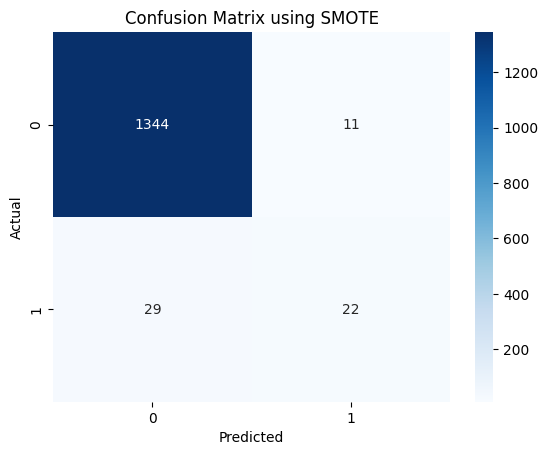

ADASYN


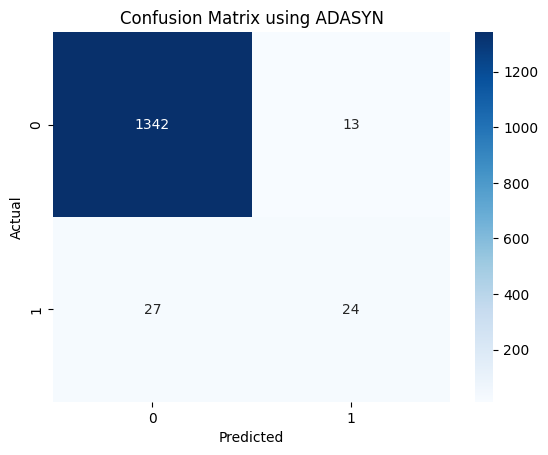

BorderlineSMOTE


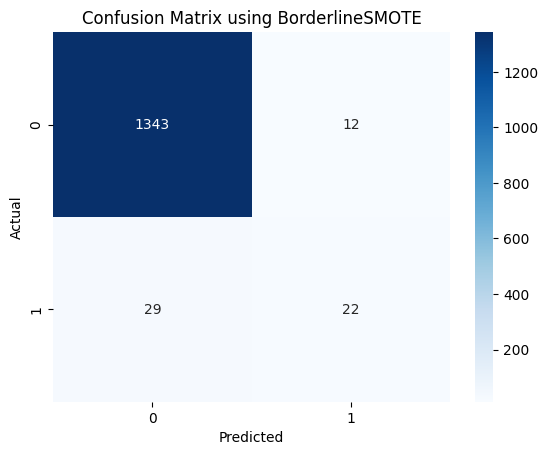

SVMSMOTE


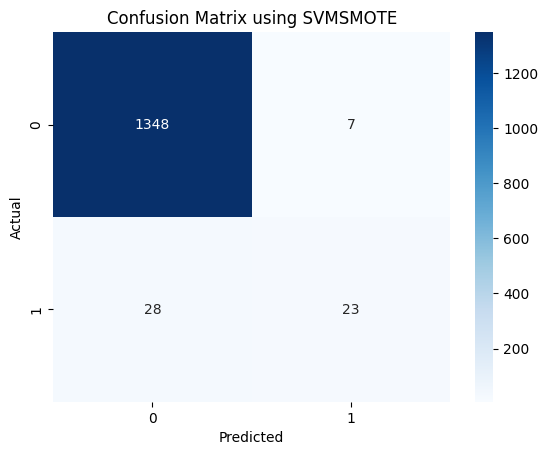

SMOTEENN


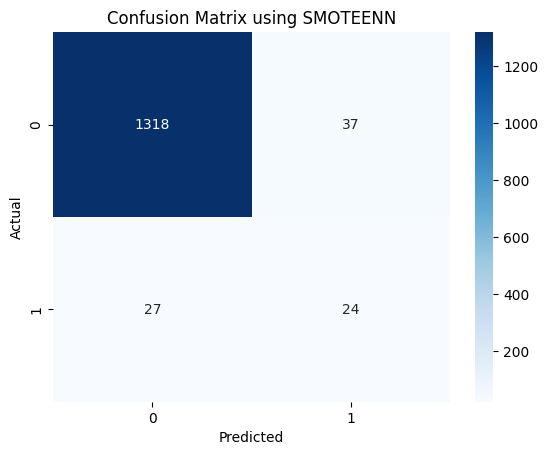

SMOTETomek


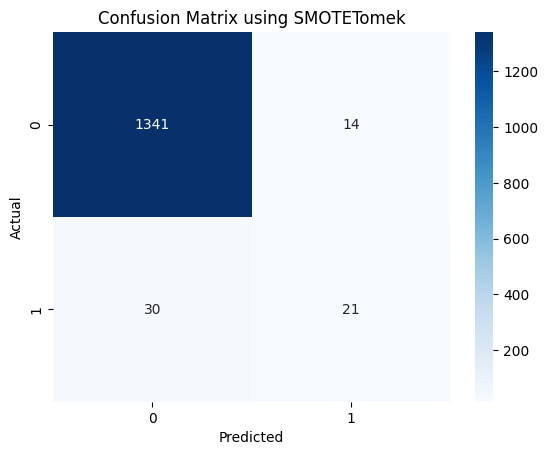

In [ ]:
#confusion matrix plot
for x in cm_xgb_pso:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

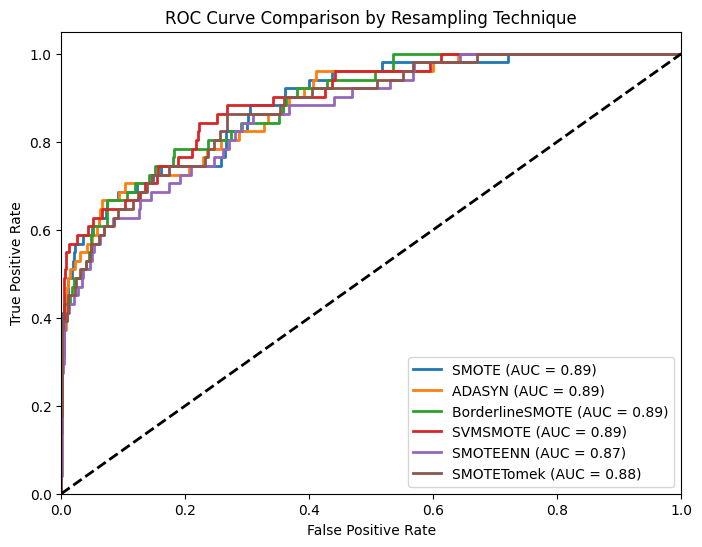

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_xgb_pso.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**ANN**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l2


In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42,stratify=y)


In [ ]:
# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Handle imbalance
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)}

results_ann = []
cm_ann=[]
roc_ann = {}
shap_values_ann = []

for name, sampler in resamplers.items():
    print(f"\nUsing {name}...")
    try:
        X_res, y_res = sampler.fit_resample(X_train_scaled, y_train)

        model = Sequential([
              Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
              BatchNormalization(),
              Dropout(0.5),
              Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
              BatchNormalization(),
              Dropout(0.3),
              Dense(1, activation='sigmoid')])

        bankrupt_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])
        optimizer = Adam(learning_rate=0.0001, clipvalue=0.5)
        model.compile(
             optimizer=optimizer,
             loss='binary_crossentropy',
             metrics=['Recall', 'Precision'])


        y_prob = model.predict(X_test_scaled).flatten()
        precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
        optimal_idx = np.argmax(f1_scores)
        optimal_threshold = thresholds[optimal_idx]
        y_pred = (y_prob >= optimal_threshold).astype(int)


        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        spe = tn / (tn + fp)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        results_ann.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_ann.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_ann[name] = (fpr, tpr, roc_auc_score(y_test, y_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_rf.append({name:shap_values})'''

        print(f"✅ {name} completed")

    except Exception as e:
        print(f"❌ {name} failed: {e}")


Using SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ SMOTE completed

Using BorderlineSMOTE...
 1/44 ━━━━━━━━━━━━━━━━━━━━ 3s 74ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ BorderlineSMOTE completed

Using ADASYN...
 1/44 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ ADASYN completed

Using SVMSMOTE...
 1/44 ━━━━━━━━━━━━━━━━━━━━ 3s 76ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ SVMSMOTE completed

Using SMOTEENN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
✅ SMOTEENN completed

Using SMOTETomek...
 1/44 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
✅ SMOTETomek completed


In [ ]:
# Create DataFrame
results_df_ann = pd.DataFrame(results_ann)

# Round for readability
results_df_ann = results_df_ann.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_ann)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.0391     0.0384                1.0000       0.0007   
1  BorderlineSMOTE    0.8954     0.0571                0.1111       0.9268   
2           ADASYN    0.0384     0.0384                1.0000       0.0000   
3         SVMSMOTE    0.0982     0.0402                0.9815       0.0629   
4         SMOTEENN    0.5647     0.0585                0.6852       0.5599   
5       SMOTETomek    0.9175     0.0811                0.1111       0.9497   

   F1 Score  ROC AUC  
0    0.0740   0.4528  
1    0.0755   0.3886  
2    0.0740   0.3991  
3    0.0771   0.4669  
4    0.1079   0.6211  
5    0.0938   0.4762

SMOTE


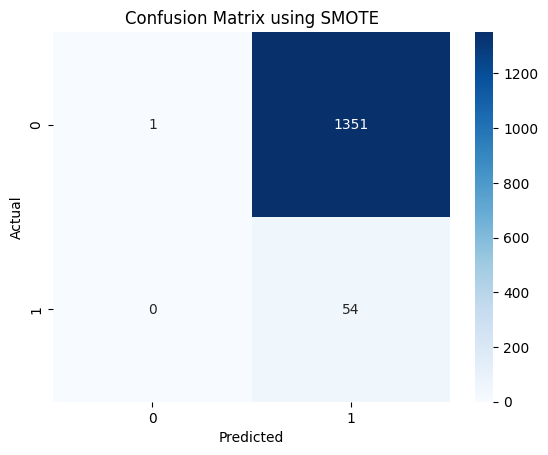

BorderlineSMOTE


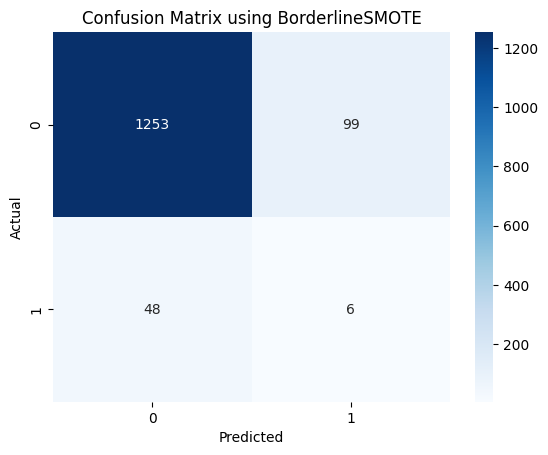

ADASYN


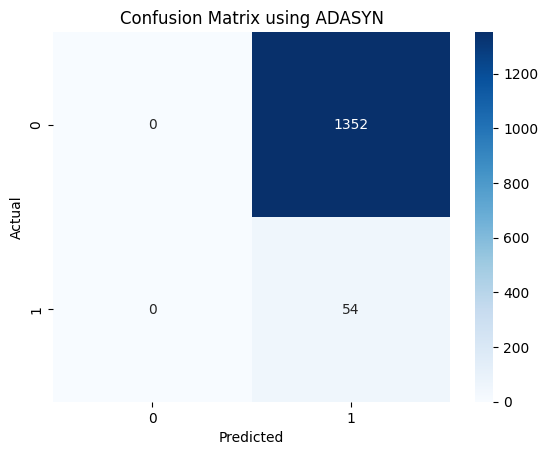

SVMSMOTE


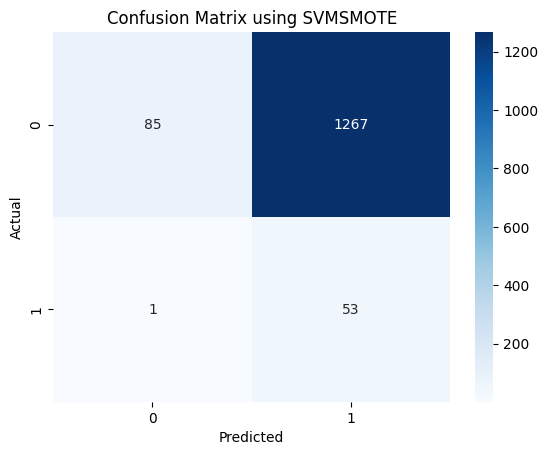

SMOTEENN


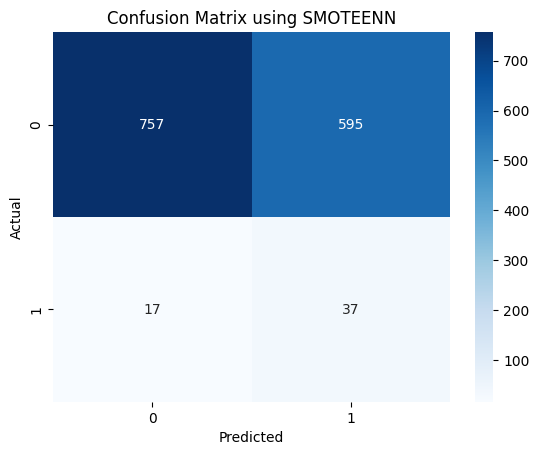

SMOTETomek


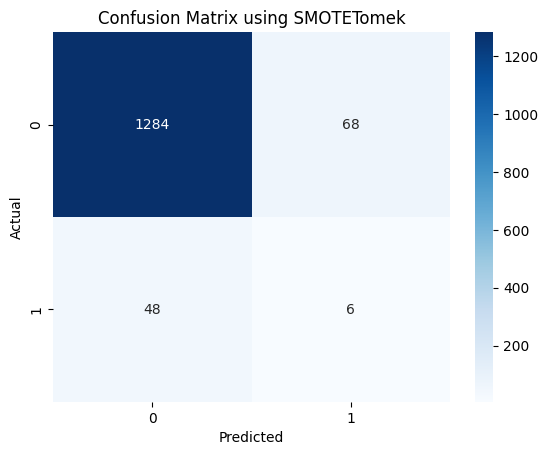

In [ ]:
#confusion matrix plot
for x in cm_ann:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

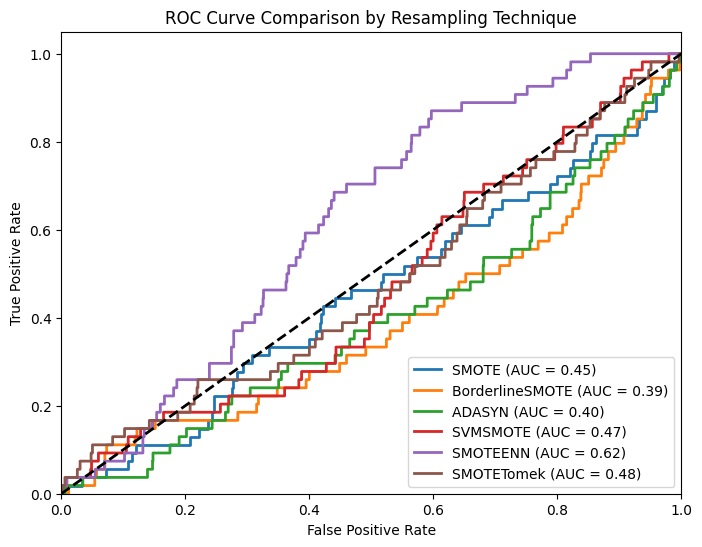

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_ann.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**MLP (6 Layers)**

In [ ]:
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_mlp = []
cm_mlp=[]
roc_mlp = {}
shap_values_mlp = []

for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X1_resampled, y1_resampled = sampler.fit_resample(X_train_scaled, y_train)

        # Define a 6-layer MLP
        model = Sequential([
            Dense(128, activation='relu', input_dim=X1_resampled.shape[1]),
            Dense(64, activation='relu'),
            Dense(32, activation='relu'),
            Dense(16, activation='relu'),
            Dense(8, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        # Early stopping
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train
        model.fit(X1_resampled, y1_resampled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

        # Predict
        y_pred_prob = model.predict(X_test_scaled).ravel()
        y_pred = (y_pred_prob >= 0.5).astype(int)

         # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob)

        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)

        results_mlp.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_mlp.append({name:cm})

         # Store ROC data
        fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
        roc_mlp[name] = (fpr, tpr, roc_auc_score(y_test, y_pred_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_mlp.append({name:shap_values})'''

    except Exception as e:
        print(f"❌ {name} failed: {e}")


SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

BorderlineSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

ADASYN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

SVMSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

SMOTEENN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

SMOTETomek...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# Create DataFrame
results_df_mlp= pd.DataFrame(results_mlp)

# Round for readability
results_df_mlp = results_df_mlp.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_mlp)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.8862     0.1159                0.2963       0.9098   
1  BorderlineSMOTE    0.8976     0.1250                0.2778       0.9223   
2           ADASYN    0.8151     0.0945                0.4444       0.8299   
3         SVMSMOTE    0.9068     0.1333                0.2593       0.9327   
4         SMOTEENN    0.7560     0.0787                0.5000       0.7663   
5       SMOTETomek    0.8649     0.1136                0.3704       0.8846   

   F1 Score  ROC AUC  
0    0.1667   0.6999  
1    0.1724   0.6764  
2    0.1558   0.6877  
3    0.1761   0.6597  
4    0.1360   0.6493  
5    0.1739   0.6863

SMOTE


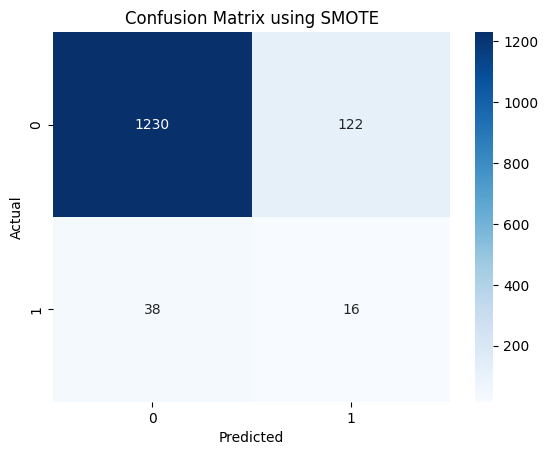

BorderlineSMOTE


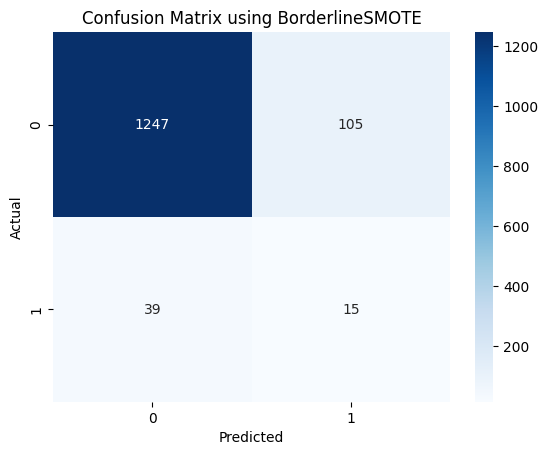

ADASYN


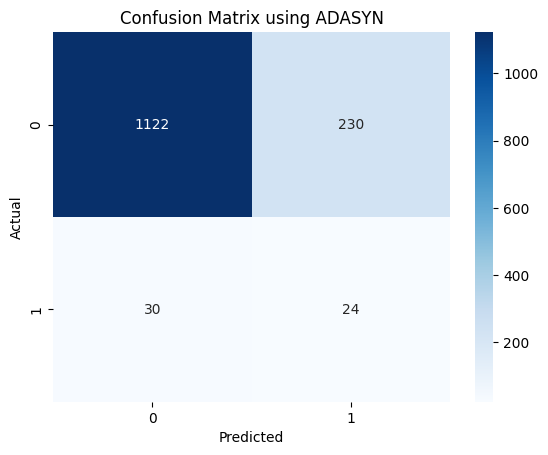

SVMSMOTE


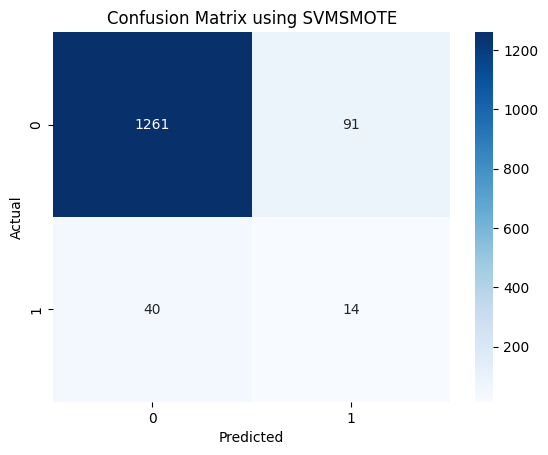

SMOTEENN


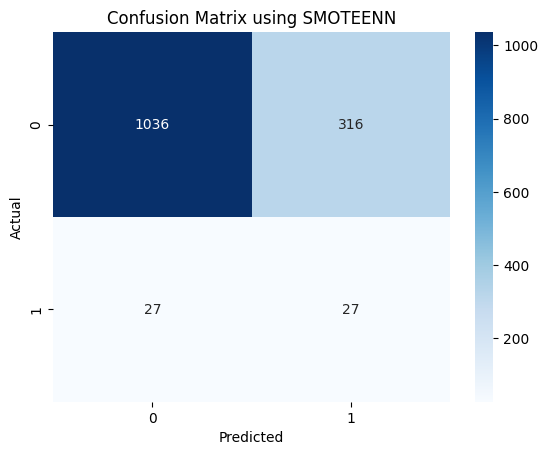

SMOTETomek


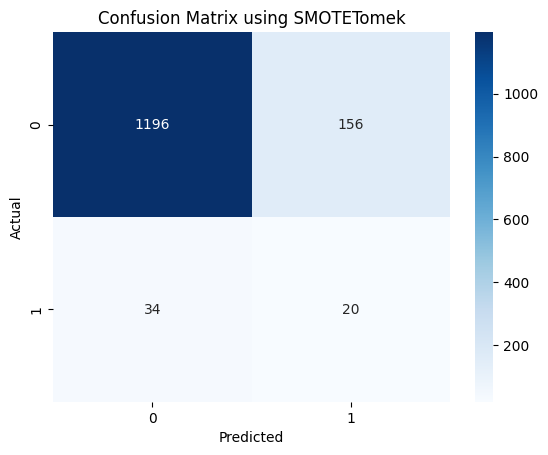

In [ ]:
#confusion matrix plot
for x in cm_mlp:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

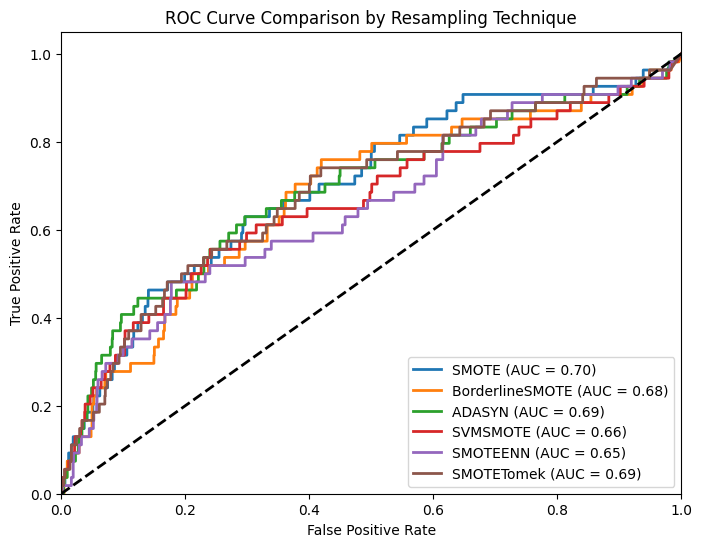

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_mlp.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**CNN**

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization

In [ ]:
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_cnn = []
cm_cnn=[]
roc_cnn = {}
shap_values_cnn = []


for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X_resampled, y_resampled = sampler.fit_resample(X_train_scaled, y_train)

        # 1D CNN
        model = Sequential([
              Conv1D(filters=64, kernel_size=3, activation='relu',
                     input_shape=(X_train.shape[1], 1), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                     BatchNormalization(),
                     MaxPooling1D(pool_size=2),
                     Dropout(0.4),

                     Conv1D(filters=128, kernel_size=2, activation='relu'),
                     BatchNormalization(),
                     MaxPooling1D(pool_size=2),
                     Dropout(0.3),

                     Flatten(),

                     Dense(64, activation='relu'),
                     BatchNormalization(),
                     Dropout(0.3),

                    Dense(1, activation='sigmoid')])

        model.compile( optimizer=Adam(learning_rate=0.0005),
                      loss='binary_crossentropy',
                      metrics=['Recall', 'Precision'])

        # Early stopping
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

        # Train
        model.fit(X_resampled, y_resampled, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stop], verbose=0)

        # Predict
        y_pred_prob = model.predict(X_test_scaled).ravel()
        y_pred = (y_pred_prob >= 0.5).astype(int)

         # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob)

        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)

        results_cnn.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc
        })

        cm_cnn.append({name:cm})

        # Store ROC data
        fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
        roc_cnn[name] = (fpr, tpr, roc_auc_score(y_test,  y_pred_prob))

        # SHAP Analysis
        '''explainer = shap.Explainer(model)
        shap_values = explainer.shap_values(X_test)
        shap_values_cnn.append({name:shap_values})'''

    except Exception as e:
        print(f"❌ {name} failed: {e}")


SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

BorderlineSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

ADASYN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

SVMSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

SMOTEENN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step

SMOTETomek...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
# Create DataFrame
results_df_cnn= pd.DataFrame(results_cnn)

# Round for readability
results_df_cnn = results_df_cnn.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_cnn)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.5875     0.0731                0.8333       0.5777   
1  BorderlineSMOTE    0.8073     0.0967                0.4815       0.8203   
2           ADASYN    0.7404     0.0853                0.5926       0.7463   
3         SVMSMOTE    0.9616     0.5000                0.0556       0.9978   
4         SMOTEENN    0.5654     0.0722                0.8704       0.5533   
5       SMOTETomek    0.6899     0.0866                0.7407       0.6879   

   F1 Score  ROC AUC  
0    0.1343   0.7689  
1    0.1610   0.7694  
2    0.1492   0.7433  
3    0.1000   0.6469  
4    0.1333   0.7455  
5    0.1550   0.7615

SMOTE


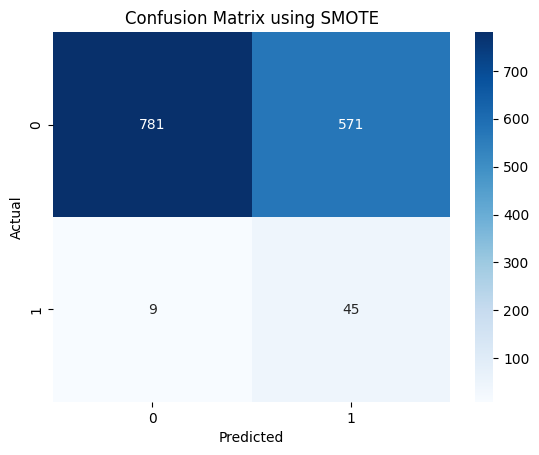

BorderlineSMOTE


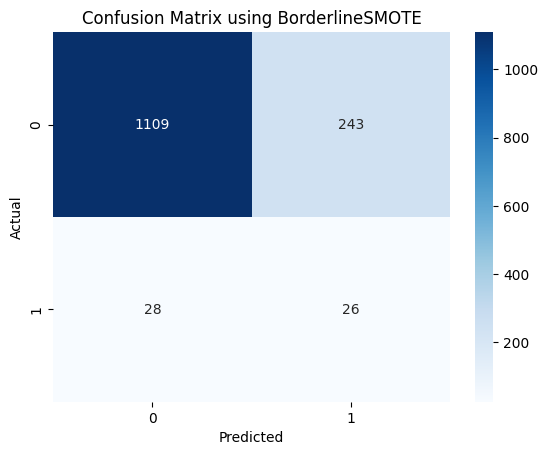

ADASYN


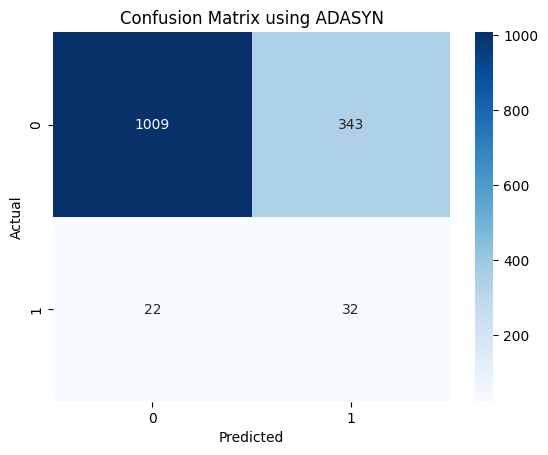

SVMSMOTE


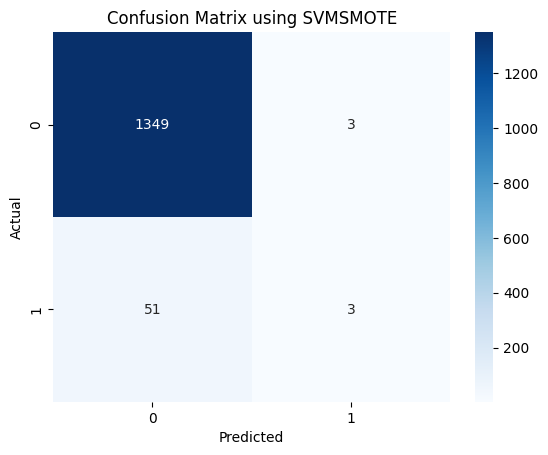

SMOTEENN


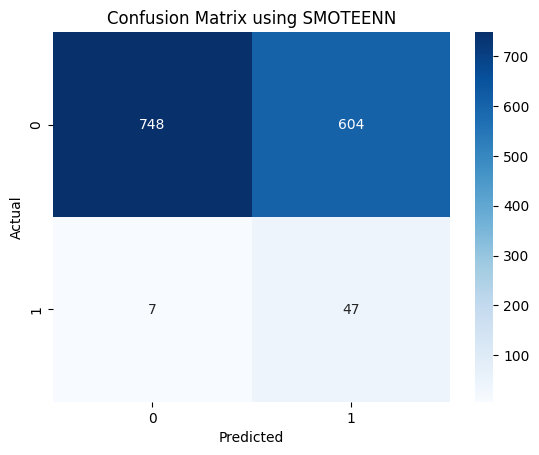

SMOTETomek


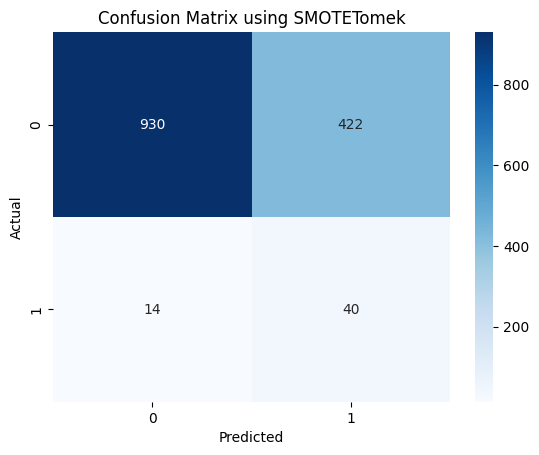

In [ ]:
#confusion matrix plot
for x in cm_cnn:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

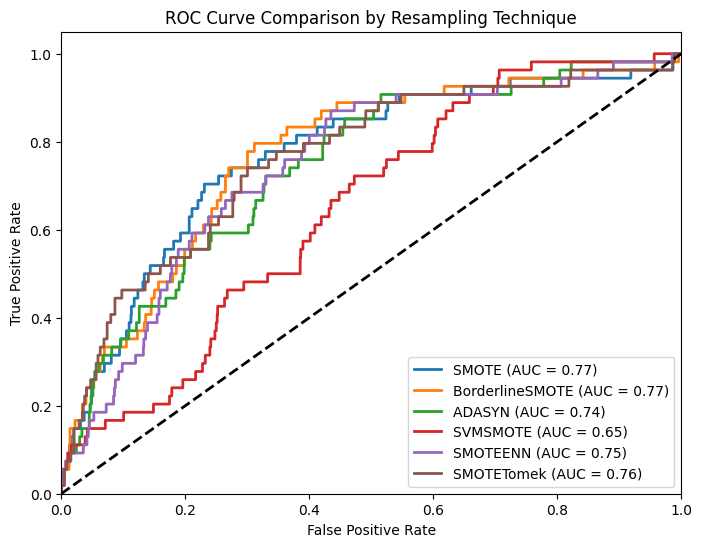

In [ ]:
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, auc) in roc_cnn.items():
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison by Resampling Technique')
plt.legend(loc="lower right")
plt.show()

**CNN with GA**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Reshape
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
from deap import base, creator, tools, algorithms

In [ ]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_cnn_ga = []
cm_cnn_ga= []

for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)

        # Genetic Algorithm for CNN hyperparameter tuning
        if not hasattr(creator, "FitnessMax"):
            creator.create("FitnessMax", base.Fitness, weights=(1.0,))
        if not hasattr(creator, "Individual"):
            creator.create("Individual", list, fitness=creator.FitnessMax)

        def create_individual():
            return [random.randint(32, 128), random.randint(2, 5)]  # filters, kernel_size

        def evaluate(ind):
            filters, kernel_size = int(ind[0]), int(ind[1])  # Ensure integer values
            model = Sequential([
                Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_resampled.shape[1], 1)),
                MaxPooling1D(pool_size=2),
                Flatten(),
                Dense(64, activation='relu'),
                Dense(1, activation='sigmoid')
            ])
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            model.fit(np.expand_dims(X_resampled, axis=2), y_resampled, validation_split=0.2,
                      epochs=10, batch_size=32, verbose=0)
            loss, accuracy = model.evaluate(np.expand_dims(X_test, axis=2), y_test, verbose=0)
            return (accuracy,)


        toolbox = base.Toolbox()
        toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
        toolbox.register("population", tools.initRepeat, list, toolbox.individual)
        toolbox.register("evaluate", evaluate)
        toolbox.register("mate", tools.cxTwoPoint)
        toolbox.register("mutate", tools.mutPolynomialBounded, eta=1.0, low=[32, 2], up=[128, 5], indpb=0.2)
        toolbox.register("select", tools.selTournament, tournsize=3)

        pop = toolbox.population(n=6)
        algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=3, verbose=False)

        best_ind = tools.selBest(pop, k=1)[0]
        best_filters, best_kernel = int(best_ind[0]), int(best_ind[1])

        # Reshape input for best CNN
        X_res_reshaped = np.expand_dims(X_resampled, axis=2)
        X_test_reshaped = np.expand_dims(X_test, axis=2)

        # Build final model with best params
        model = Sequential([
            Conv1D(filters=best_filters, kernel_size=best_kernel, activation='relu', input_shape=(X_res_reshaped.shape[1], 1)),
            MaxPooling1D(pool_size=2),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model.fit(X_res_reshaped, y_resampled, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop], verbose=0)

        # Predict
        y_pred_prob = model.predict(X_test_reshaped).ravel()
        y_pred = (y_pred_prob >= 0.5).astype(int)

        # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob)
        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)

        results_cnn_ga.append({
            "Resampling": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc,
            "Params": f"filters={best_filters}, kernel_size={best_kernel}"
        })
        cm_cnn_ga.append({name:cm})

    except Exception as e:
        print(f"❌ {name} failed: {e}")



SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

BorderlineSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

ADASYN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

SVMSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

SMOTEENN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step

SMOTETomek...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
# Create DataFrame
results_df_cnn_ga= pd.DataFrame(results_cnn_ga)

# Round for readability
results_df_cnn_ga = results_df_cnn_ga.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_cnn_ga)


📊 Comparison of Resampling Techniques:


Resampling  Accuracy  Precision  Recall (Sensitivity)  Specificity  \
0            SMOTE    0.6294     0.0680                0.7255       0.6258   
1  BorderlineSMOTE    0.7809     0.0868                0.5294       0.7904   
2           ADASYN    0.7546     0.0847                0.5882       0.7609   
3         SVMSMOTE    0.9381     0.1538                0.1569       0.9675   
4         SMOTEENN    0.5277     0.0577                0.7843       0.5181   
5       SMOTETomek    0.7404     0.0780                0.5686       0.7469   

   F1 Score  ROC AUC                      Params  
0    0.1244   0.7015  filters=128, kernel_size=5  
1    0.1492   0.6864  filters=110, kernel_size=2  
2    0.1481   0.6923   filters=73, kernel_size=2  
3    0.1553   0.6892   filters=42, kernel_size=5  
4    0.1075   0.7112  filters=122, kernel_size=2  
5    0.1371   0.6968   filters=54, kernel_size=5

SMOTE


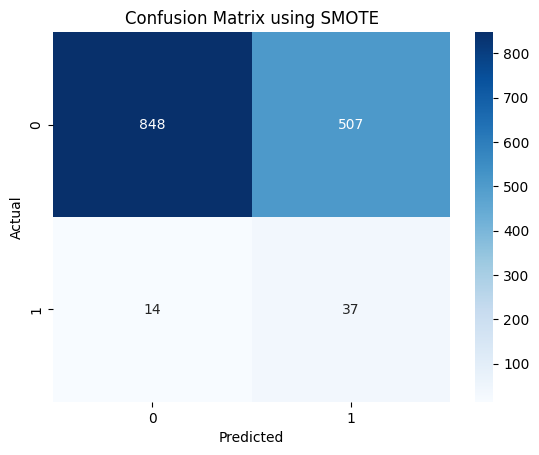

BorderlineSMOTE


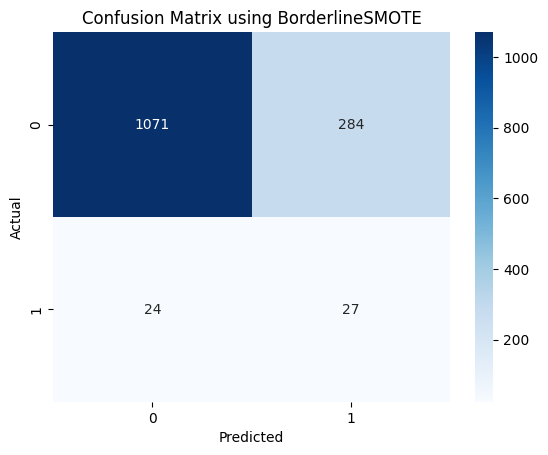

ADASYN


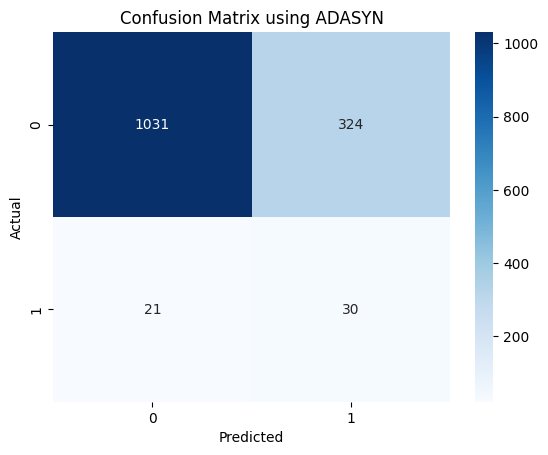

SVMSMOTE


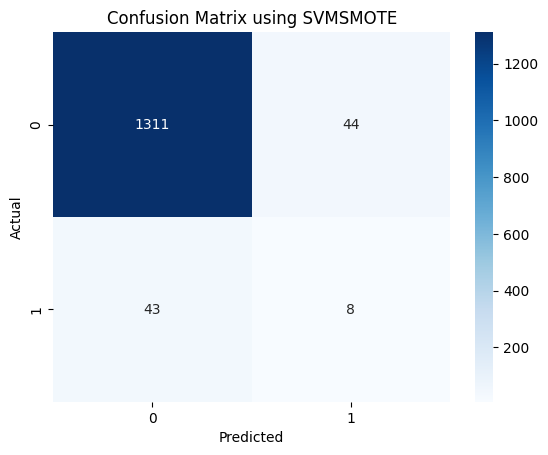

SMOTEENN


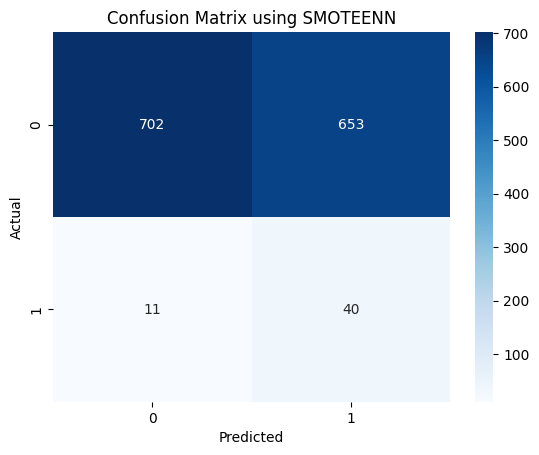

SMOTETomek


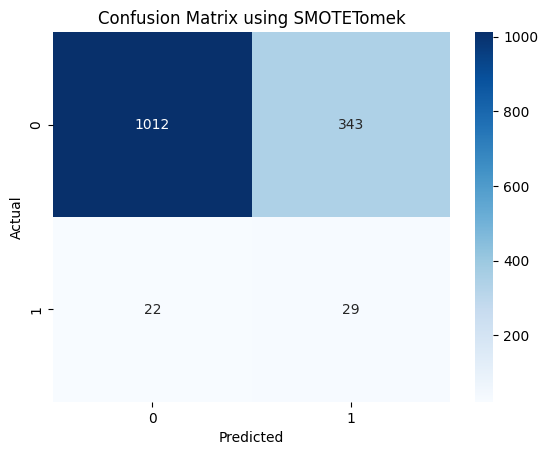

In [ ]:
#confusion matrix plot
for x in cm_cnn_ga:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

**CNN with PSO**

In [ ]:
# Scale data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)


In [ ]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
resamplers = {
    "SMOTE": SMOTE(random_state=42),
    "BorderlineSMOTE": BorderlineSMOTE(random_state=42),
    "ADASYN": ADASYN(random_state=42),
    "SVMSMOTE": SVMSMOTE(random_state=42),
    "SMOTEENN": SMOTEENN(random_state=42),
    "SMOTETomek": SMOTETomek(random_state=42)
}

results_cnn_pso = []
cm_cnn_pso= []

for name, sampler in resamplers.items():
    try:
        print(f"\n{name}...")

        # Resample the training data
        X_resampled, y_resampled = sampler.fit_resample(X_train, y_train)


        # Reshape input for CNN
        X_res_reshaped = np.expand_dims(X_resampled, axis=2)
        X_test_reshaped = np.expand_dims(X_test, axis=2)

        # Define fitness function for PSO
        def fitness_function(params):
            scores = []
            for i in range(params.shape[0]):
                filters = int(params[i, 0])
                kernel_size = int(params[i, 1])
                try:
                    model = Sequential([
                        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_res_reshaped.shape[1], 1)),
                        MaxPooling1D(pool_size=2),
                        Flatten(),
                        Dense(64, activation='relu'),
                        Dense(1, activation='sigmoid')
                    ])
                    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
                    model.fit(X_res_reshaped, y_resampled, validation_split=0.2, epochs=10, batch_size=32, verbose=0)
                    loss, accuracy = model.evaluate(X_test_reshaped, y_test, verbose=0)
                    scores.append(-accuracy)  # Minimize negative accuracy
                except:
                    scores.append(1.0)  # Penalize failure
            return np.array(scores)

        # PSO bounds and optimization
        bounds = ([32, 2], [128, 5])
        optimizer = ps.single.GlobalBestPSO(n_particles=6, dimensions=2, options={'c1': 0.5, 'c2': 0.3, 'w': 0.9}, bounds=bounds)
        best_cost, best_pos = optimizer.optimize(fitness_function, iters=5, verbose=False)

        best_filters = int(best_pos[0])
        best_kernel = int(best_pos[1])

        # Build final CNN model with best parameters
        model = Sequential([
            Conv1D(filters=best_filters, kernel_size=best_kernel, activation='relu', input_shape=(X_res_reshaped.shape[1], 1)),
            MaxPooling1D(pool_size=2),
            Flatten(),
            Dense(64, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        model.fit(X_res_reshaped, y_resampled, validation_split=0.2, epochs=50, batch_size=32, callbacks=[early_stop], verbose=0)

        # Predict
        y_pred_prob = model.predict(X_test_reshaped).ravel()
        y_pred = (y_pred_prob >= 0.5).astype(int)

        # Evaluate
        cm = confusion_matrix(y_test, y_pred)
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, zero_division=0)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_pred_prob)
        tn, fp, fn, tp = cm.ravel()
        spe = tn / (tn + fp)

        results_cnn_pso.append({
            "Resampling Technique": name,
            "Accuracy": acc,
            "Precision": prec,
            "Recall (Sensitivity)": rec,
            "Specificity": spe,
            "F1 Score": f1,
            "ROC AUC": auc,
            "Params": f"filters={best_filters}, kernel_size={best_kernel}"
        })
        cm_cnn_pso.append({name:cm})


    except Exception as e:
        print(f"❌ {name} failed: {e}")



SMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

BorderlineSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

ADASYN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

SVMSMOTE...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

SMOTEENN...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

SMOTETomek...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [ ]:
# Create DataFrame
results_df_cnn_pso= pd.DataFrame(results_cnn_pso)

# Round for readability
results_df_cnn_pso = results_df_cnn_pso.round(4)

# Display
print("\n📊 Comparison of Resampling Techniques:")
display(results_df_cnn_pso)


📊 Comparison of Resampling Techniques:


Resampling Technique  Accuracy  Precision  Recall (Sensitivity)  \
0                SMOTE    0.7674     0.0818                0.5294   
1      BorderlineSMOTE    0.8421     0.1023                0.4314   
2               ADASYN    0.7838     0.0825                0.4902   
3             SVMSMOTE    0.9346     0.1273                0.1373   
4             SMOTEENN    0.6863     0.0815                0.7451   
5           SMOTETomek    0.7980     0.0912                0.5098   

   Specificity  F1 Score  ROC AUC                      Params  
0       0.7764    0.1417   0.6983  filters=105, kernel_size=4  
1       0.8576    0.1654   0.6897   filters=98, kernel_size=3  
2       0.7948    0.1412   0.6877  filters=121, kernel_size=2  
3       0.9646    0.1321   0.6775  filters=100, kernel_size=3  
4       0.6841    0.1470   0.7324   filters=95, kernel_size=3  
5       0.8089    0.1548   0.7072  filters=108, kernel_size=4

SMOTE


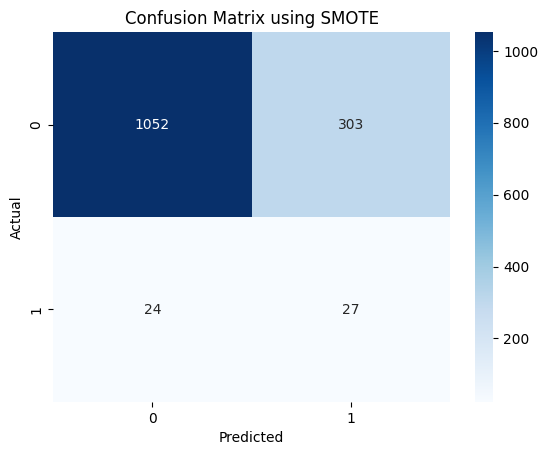

BorderlineSMOTE


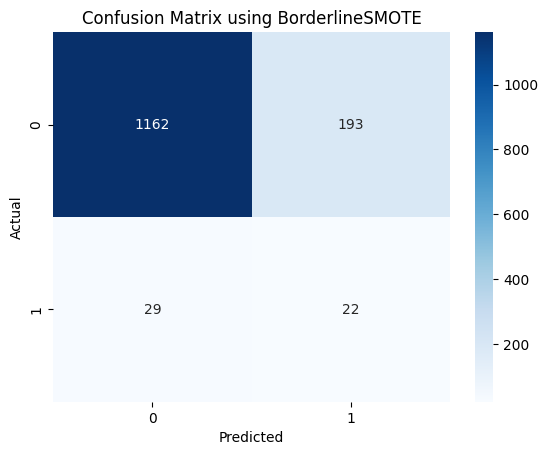

ADASYN


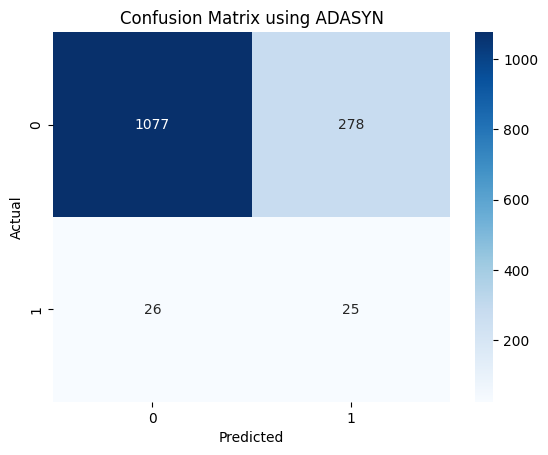

SVMSMOTE


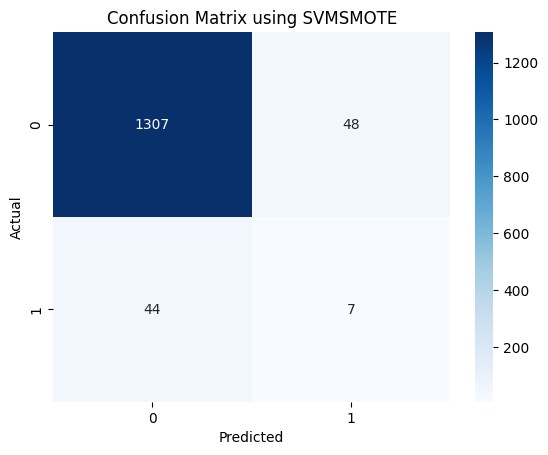

SMOTEENN


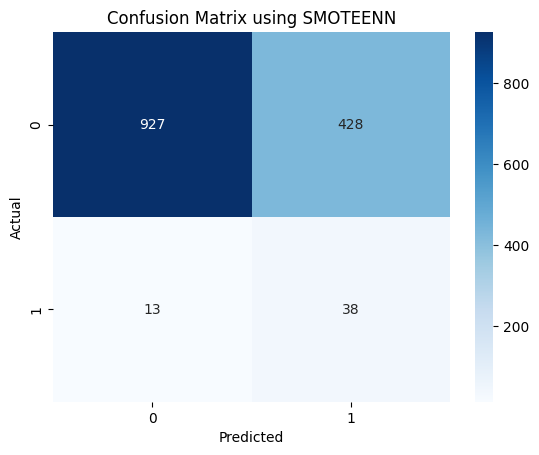

SMOTETomek


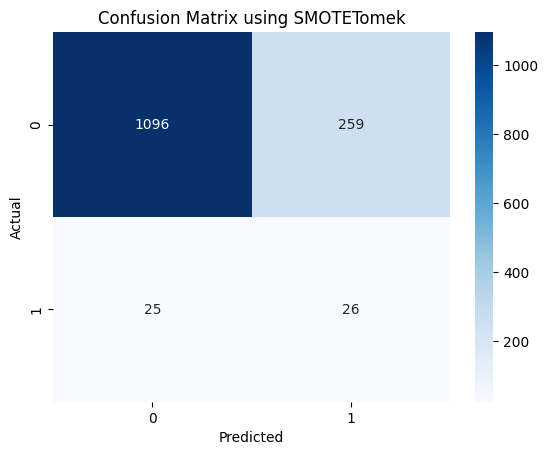

In [ ]:
#confusion matrix plot
for x in cm_cnn_pso:
    for k in x:
        print(k)
        sns.heatmap(x[k], annot=True, fmt='d', cmap='Blues')
        plt.title(f"Confusion Matrix using {k}")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()